# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [598]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [601]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [604]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [606]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [1]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

NameError: name 'joblib' is not defined

#### 2) 기본 정보 조회

In [611]:
# 데이터 살펴보기
apart.head(3)

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,0,78,0,0,0,56962000.0,642930.0
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,0,35,0,0,0,0,0,0,63062000.0,470100.0
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,0,88,0,0,0,72190000.0,586540.0


In [612]:
# 하위 몇 개 행 확인
apart.tail()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
340,C0354,1485,대전충남,1993,복도식,중앙난방,전체동 설치,298,64622.2500,0,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙가스난방,전체동 설치,258,57616.8100,0,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역가스난방,전체동 설치,243,37398.7200,0,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별가스난방,전체동 설치,47,5581.8024,0,66,54,0,0,0,0,0,2.515500e+06,50040.000000
344,C0359,447,대구경북,1994,복도식,중앙유류난방,전체동 설치,78,19383.4100,0,149,298,0,0,0,0,0,7.628000e+06,125010.000000


In [613]:
# 변수 확인
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int32  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적0_10    345 non-null    int64  
 10  면적10_30   345 non-null    int64  
 11  면적30_40   345 non-null    int64  
 12  면적40_50   345 non-null    int64  
 13  면적50_60   345 non-null    int64  
 14  면적60_70   345 non-null    int64  
 15  면적70_80   345 non-null    int64  
 16  면적80_200  345 non-null    int64  
 17  임대보증금     345 non-null    float64
 18  임대료       345 non-null    float64
dtypes: float64(3), int32(1), int64(10), object(5)
memory usage: 50.0+ KB


In [614]:
# 데이터프레임의 행과 열 개수
apart.shape

(345, 19)

## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [616]:
# 데이터 타입 확인
apart.dtypes

단지코드         object
총세대수          int64
지역           object
준공연도          int32
건물형태         object
난방방식         object
승강기설치여부      object
실차량수          int64
총면적         float64
면적0_10        int64
면적10_30       int64
면적30_40       int64
면적40_50       int64
면적50_60       int64
면적60_70       int64
면적70_80       int64
면적80_200      int64
임대보증금       float64
임대료         float64
dtype: object

In [617]:
# 기술통계 확인
apart.describe()

,총세대수,준공연도,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.0,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,0.0,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,0.0,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.0,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.0,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,0.0,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [618]:
# 상관관계 확인
apart.corr(numeric_only=True)

,총세대수,준공연도,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
총세대수,1.000000,0.085396,0.712475,0.927286,NaN,0.373339,0.597814,0.589794,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.085396,1.000000,0.287266,0.171747,NaN,0.120319,-0.159878,-0.059953,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
실차량수,0.712475,0.287266,1.000000,0.822183,NaN,0.077284,0.211912,0.392055,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
총면적,0.927286,0.171747,0.822183,1.000000,NaN,0.174025,0.410497,0.486441,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
면적0_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
면적10_30,0.373339,0.120319,0.077284,0.174025,NaN,1.000000,0.161576,0.047730,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
면적30_40,0.597814,-0.159878,0.211912,0.410497,NaN,0.161576,1.000000,0.376596,-0.132072,-0.043037,-0.168306,-0.224689,-0.121064,-0.085508
면적40_50,0.589794,-0.059953,0.392055,0.486441,NaN,0.047730,0.376596,1.000000,-0.074343,-0.038634,-0.151085,-0.201694,-0.069538,-0.068149
면적50_60,0.387626,0.079040,0.381746,0.457999,NaN,-0.124520,-0.132072,-0.074343,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231
면적60_70,0.056001,0.066059,0.151615,0.102296,NaN,-0.016124,-0.043037,-0.038634,-0.029779,1.000000,0.265453,-0.016725,0.032534,0.114207


In [619]:
# NaN 값 확인
apart.isnull().sum()

단지코드        0
총세대수        0
지역          0
준공연도        0
건물형태        0
난방방식        0
승강기설치여부     0
실차량수        0
총면적         0
면적0_10      0
면적10_30     0
면적30_40     0
면적40_50     0
면적50_60     0
면적60_70     0
면적70_80     0
면적80_200    0
임대보증금       0
임대료         0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [622]:
# 함수 만들기
def analyze_continuous(df, column):
    # 기술 통계 출력
    print(f"--- {column}의 기술 통계 ---")
    print(df[column].describe())
    
    # 히스토그램
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"{column}의 히스토그램")
    plt.xlabel(column)
    plt.ylabel('빈도수')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f"{column}의 박스플롯")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

#### 1) 실차량수

--- 실차량수의 기술 통계 ---
count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64


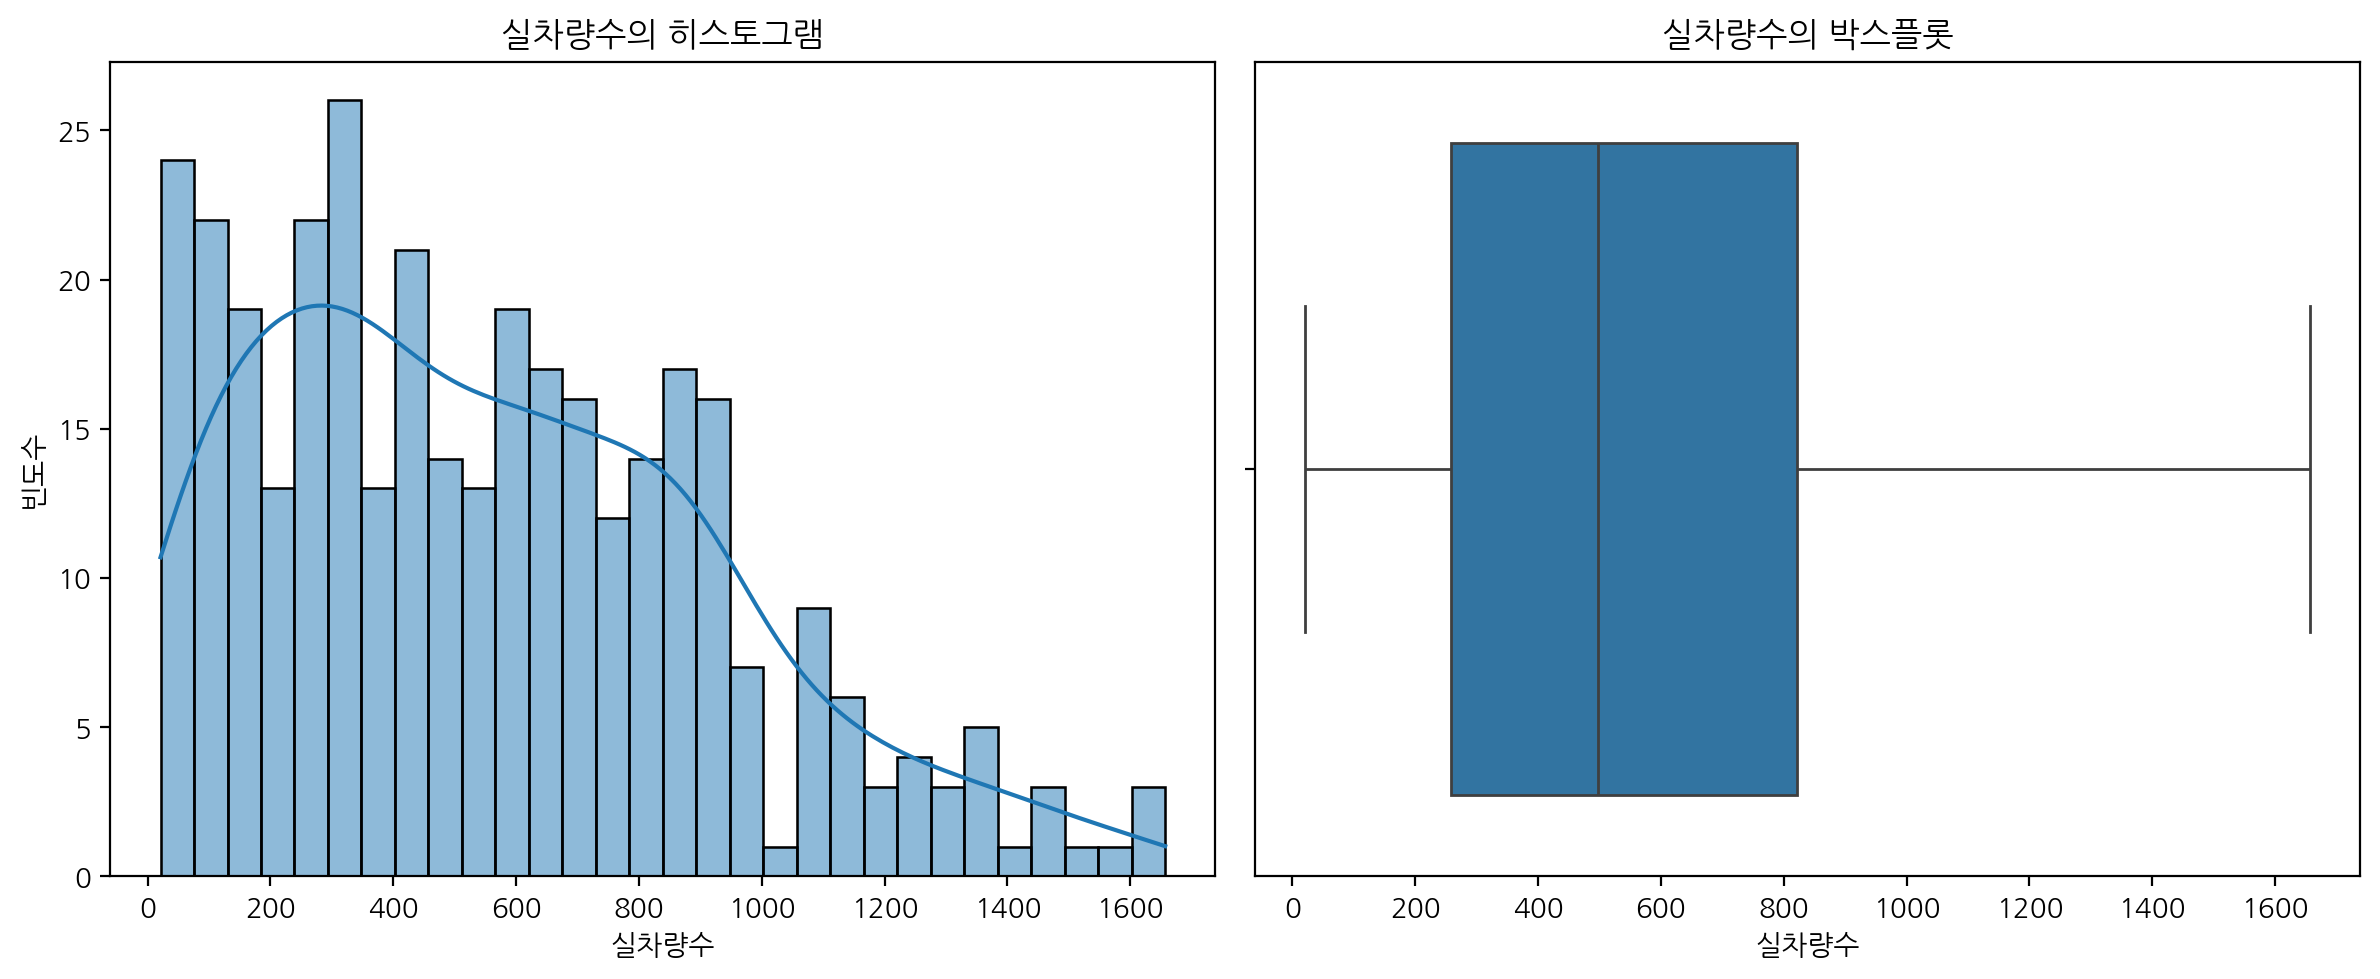

In [624]:
# 실차량수
analyze_continuous(apart, '실차량수')

# 분석
# 히스토그램 분포를 보면 데이터가 우측으로 치우쳐 있는 걸 통해 상대적으로 많은 데이터가 낮은 값에 집중되는 것을 볼 수 있습니다. 
# 박스플롯을 보면 이상치가 존재하지 않는다는 것을 알 수 있습니다. 

#### 2) 총세대수

--- 총세대수의 기술 통계 ---
count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64


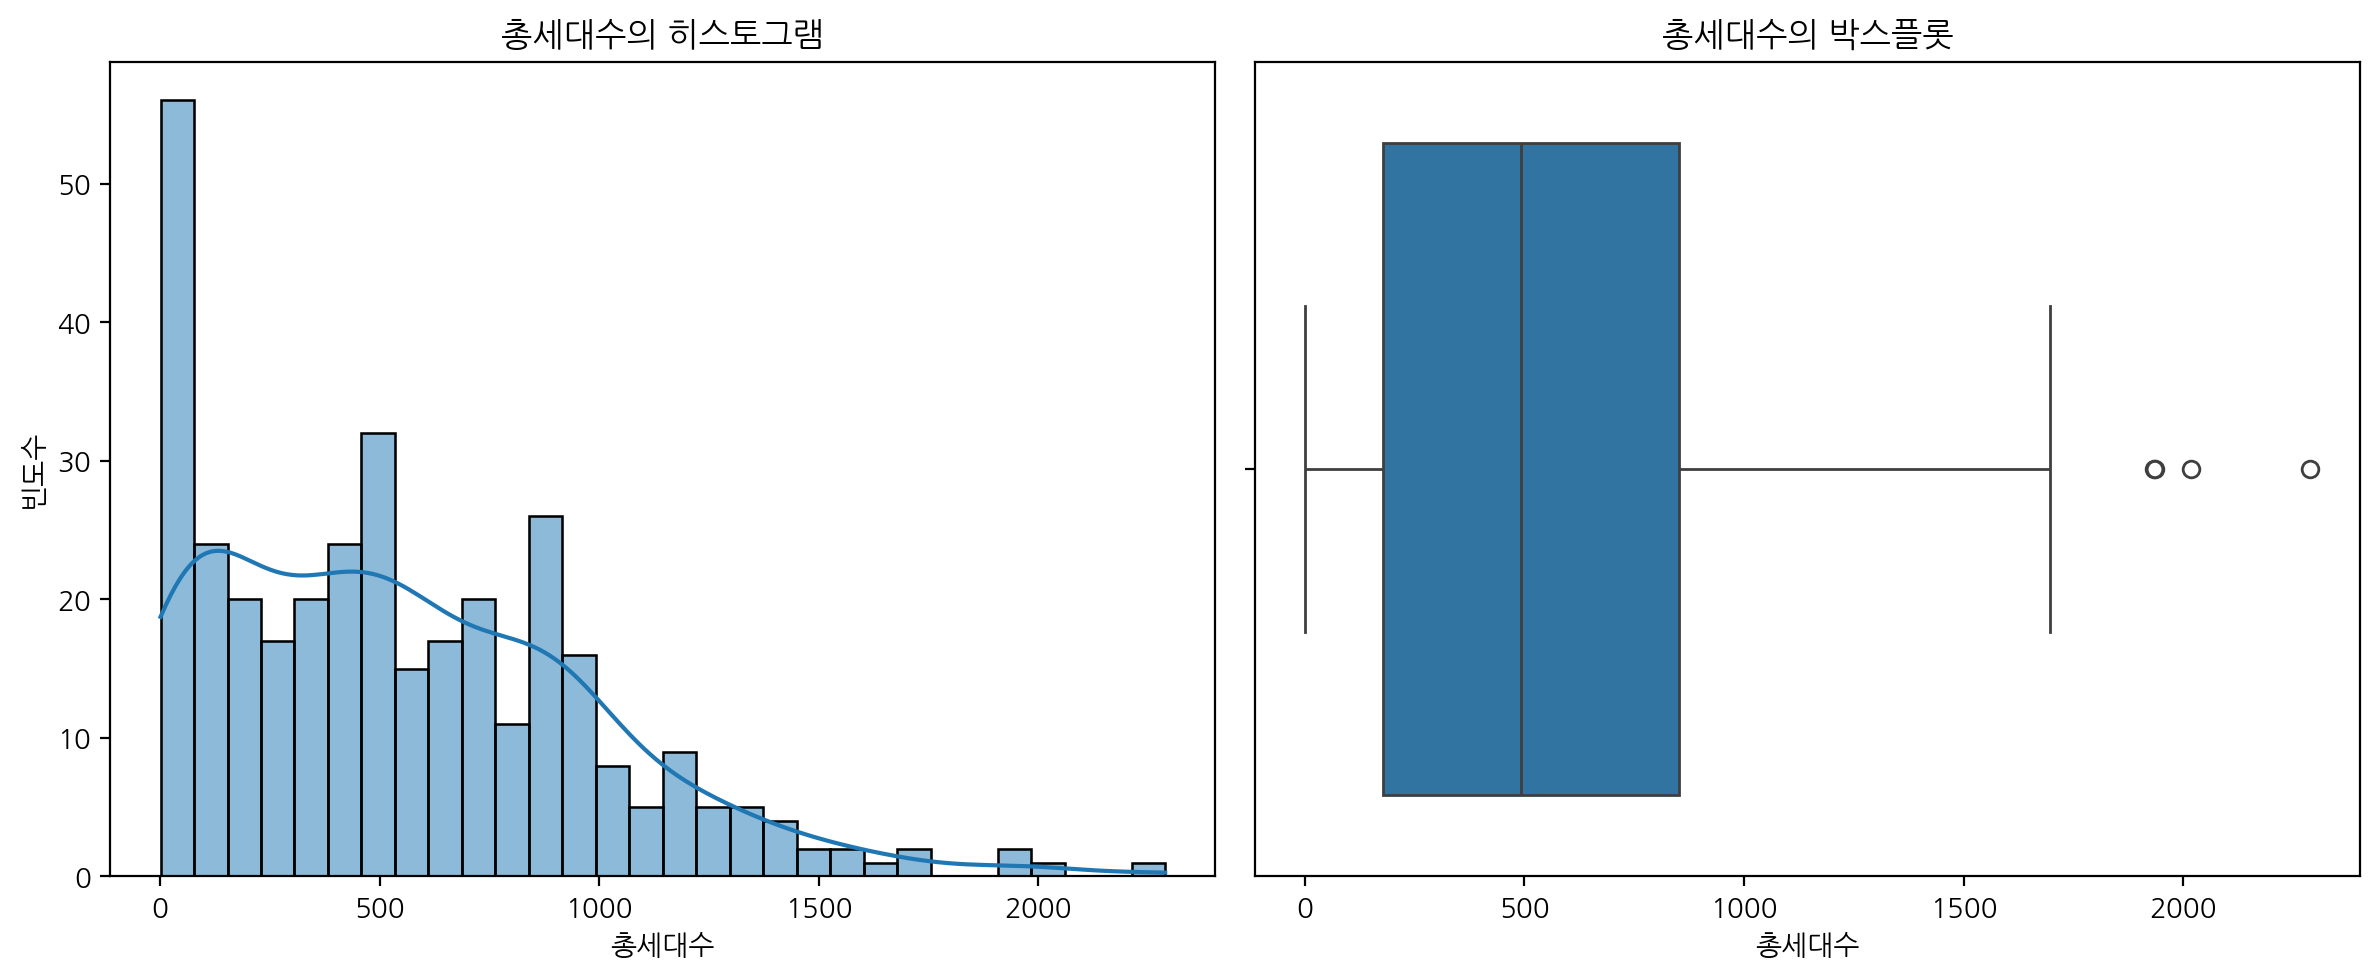

In [626]:
# 총세대수
analyze_continuous(apart, '총세대수')

# 분석
# 히스토그램 분포를 보면 데이터가 우측으로 치우쳐 있는 걸 통해 상대적으로 많은 데이터가 낮은 값에 집중되는 것을 볼 수 있습니다. 
# 박스플롯을 통해 이상치가 존재한다는 것을 알 수 있습니다. 

#### 3) 총면적

--- 총면적의 기술 통계 ---
count       345.000000
mean      37282.661962
std       29588.197927
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64


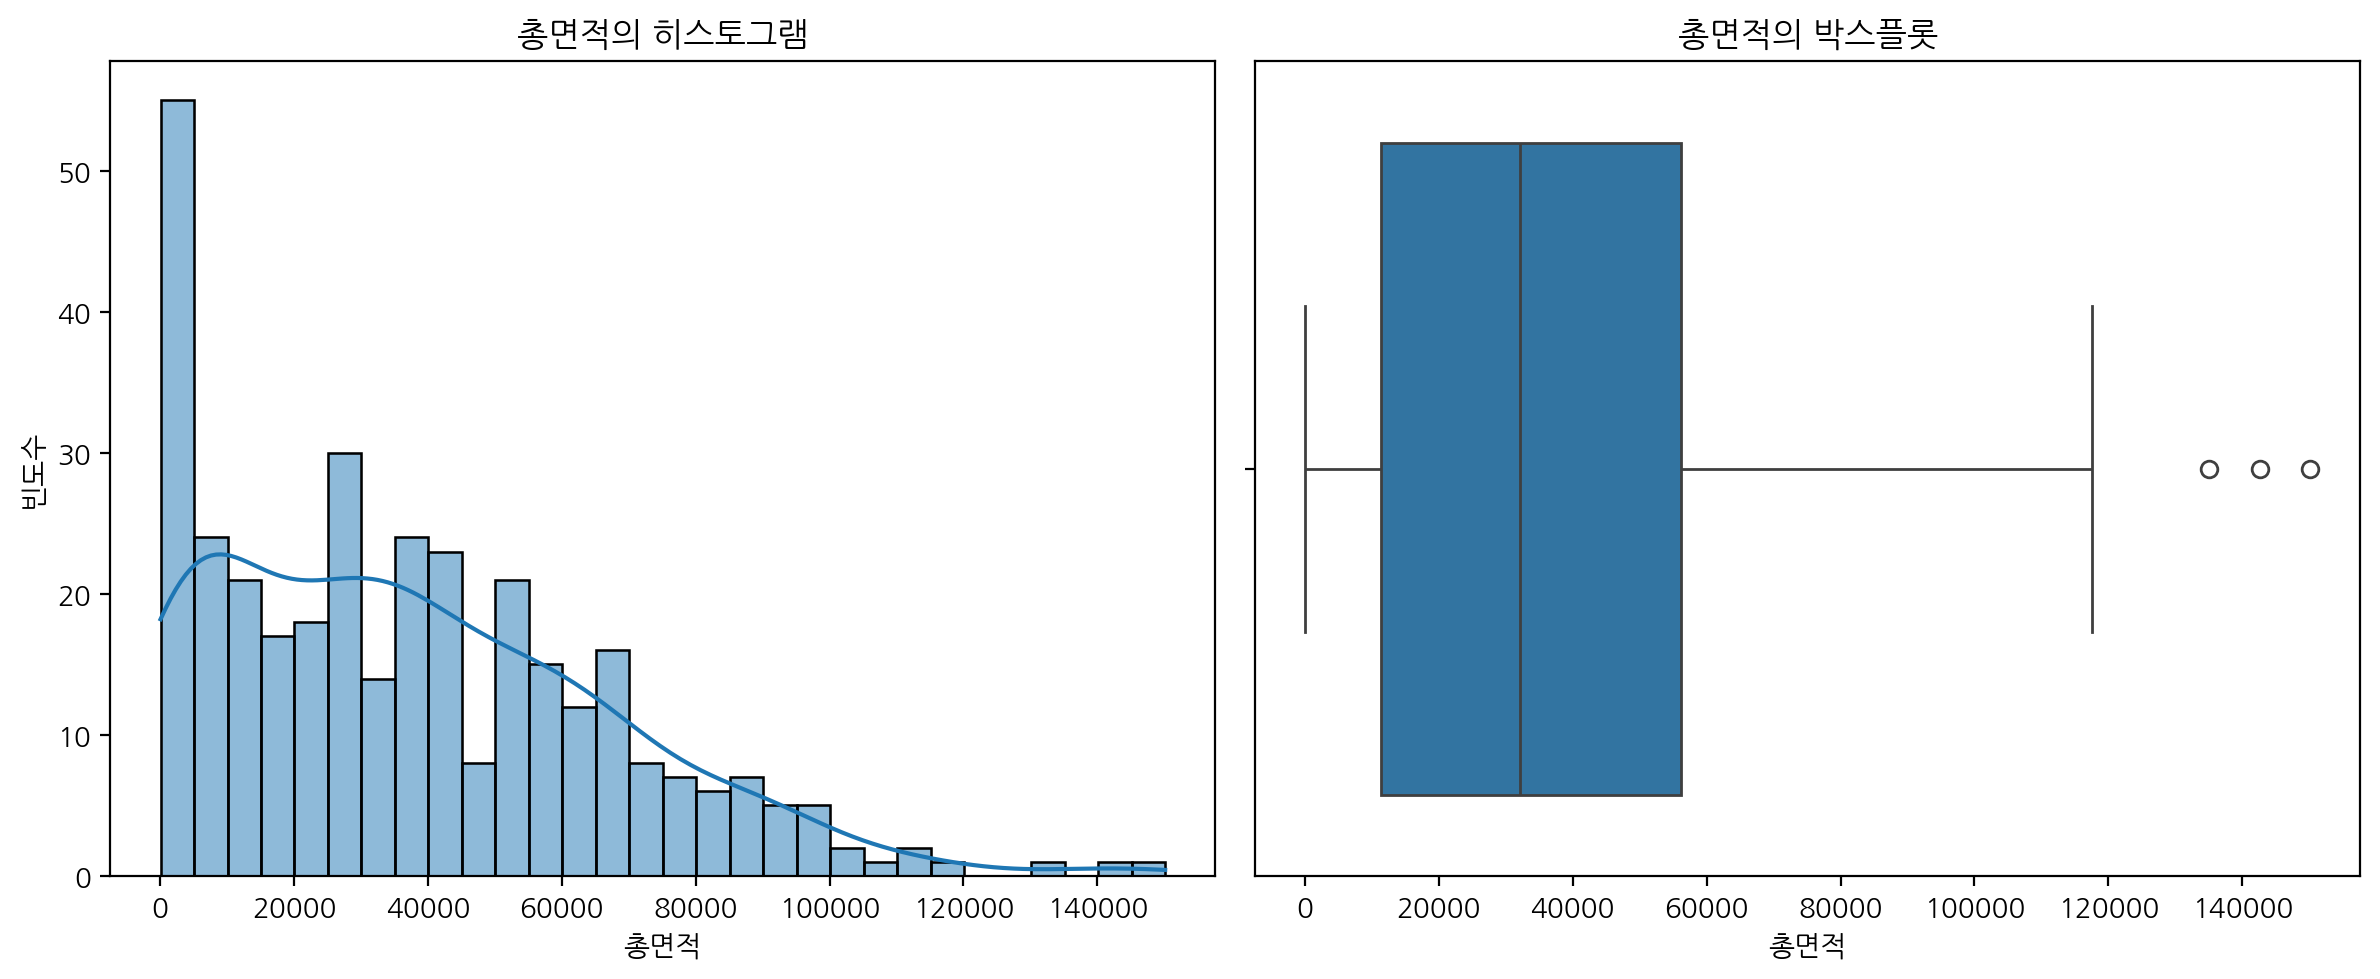

In [628]:
# 총면적
analyze_continuous(apart, '총면적')

# 분석
# 히스토그램 분포를 보면 데이터가 우측으로 치우쳐 있는 걸 통해 상대적으로 많은 데이터가 낮은 값에 집중되는 것을 볼 수 있습니다. 
# 박스플롯을 통해 이상치가 존재한다는 것을 알 수 있습니다. 

#### 4) 준공연도

--- 준공연도의 기술 통계 ---
count     345.000000
mean     2007.713043
std         7.261036
min      1992.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64


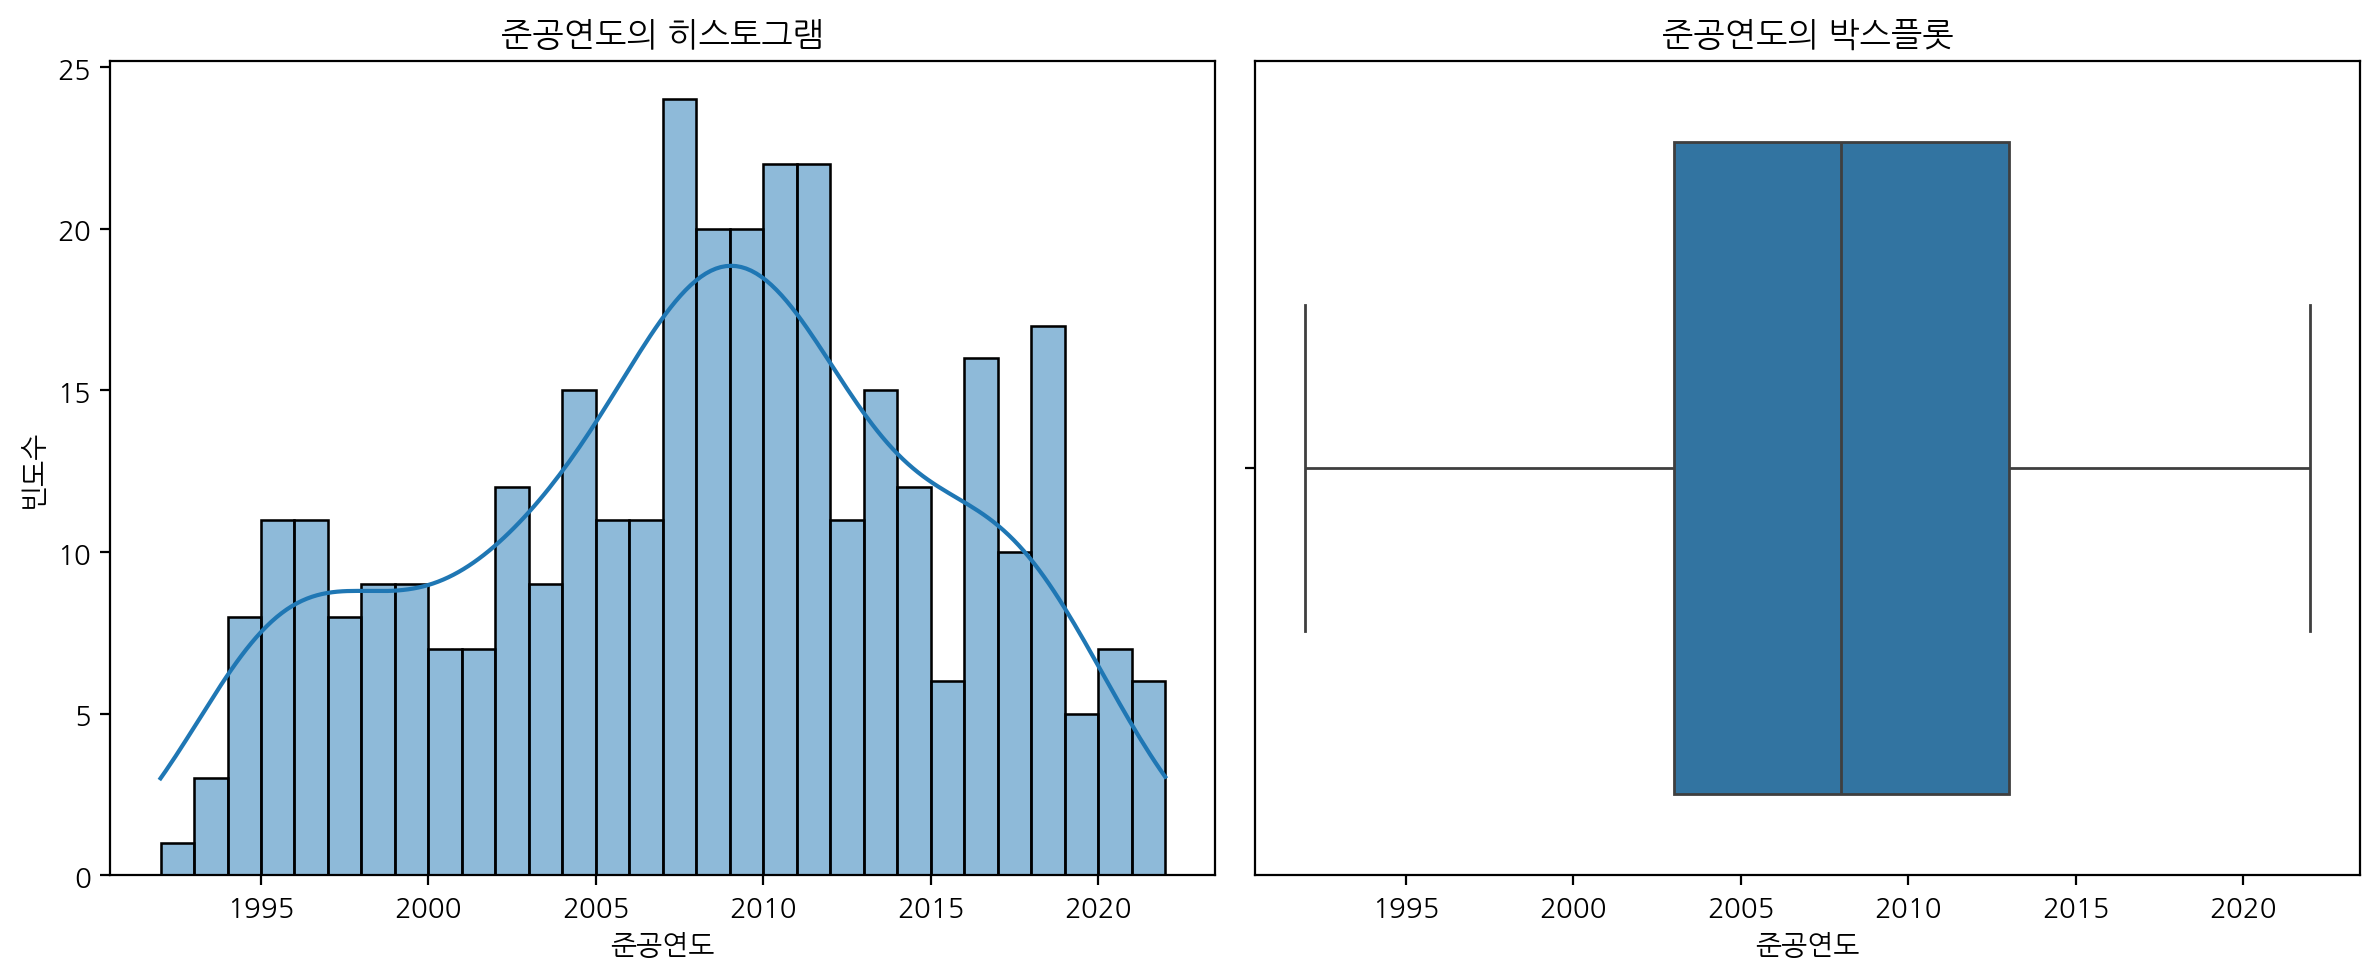

In [630]:
# 준공연도
analyze_continuous(apart, '준공연도')

# 분석
# 히스토그램 분포를 보면 준공연도 2007년 ~ 2011까지 상대적으로 많은 데이터가 포진되어 있는 것을 볼 수 있습니다.  
# 박스플롯을 통해 이상치가 존재하지 않는다는 것을 알 수 있습니다. 

#### 5) 임대료

--- 임대료의 기술 통계 ---
count       345.000000
mean     197729.050210
std      158760.777669
min           0.000000
25%      112905.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64


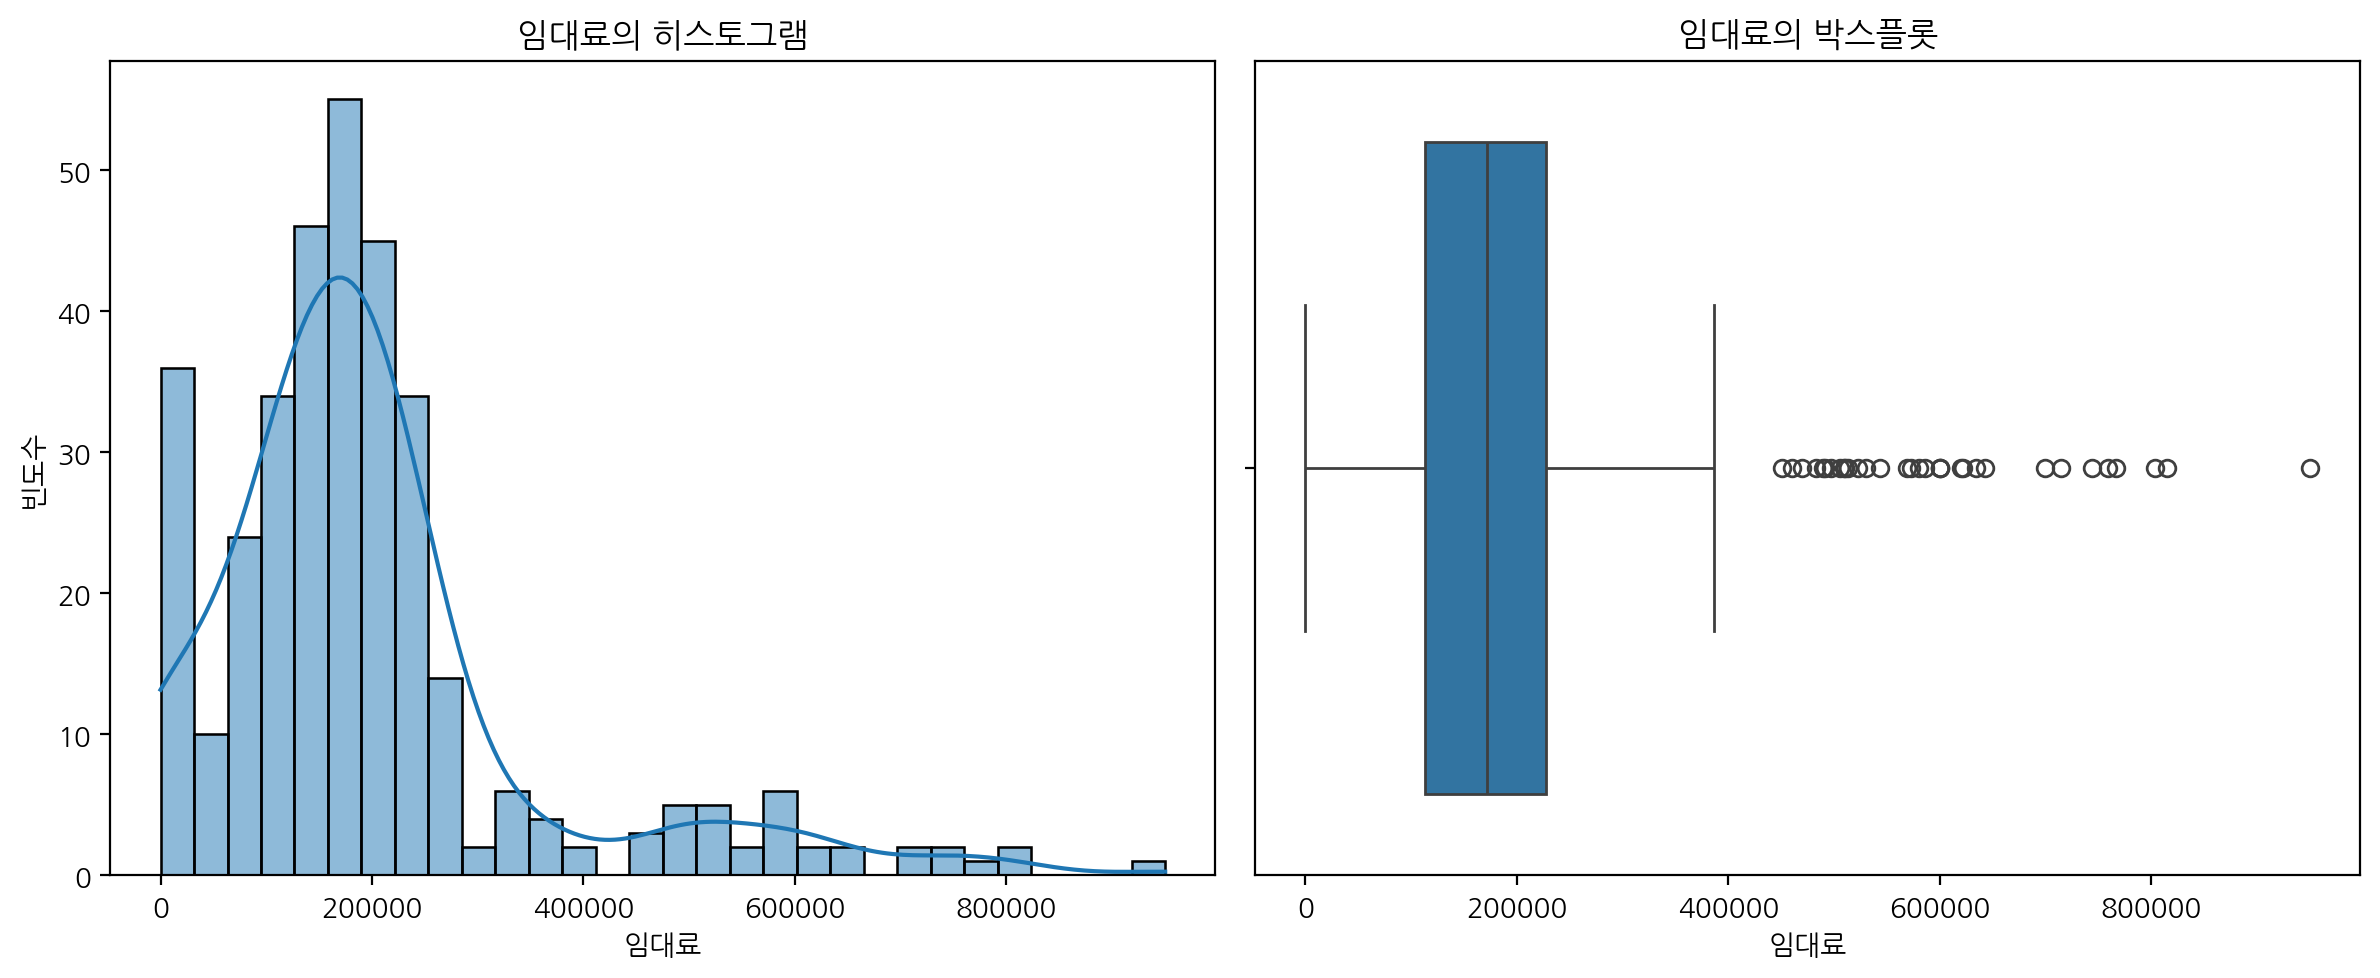

In [632]:
# 임대료
analyze_continuous(apart, '임대료')

# 분석
# 히스토그램 분포를 보면 데이터가 우측으로 치우쳐 있는 걸 통해 상대적으로 많은 데이터가 낮은 값에 집중되는 것을 볼 수 있습니다. 
# 박스플롯을 통해 이상치가 많이 존재하는 것을 볼 수 있습니다. 

#### 6) 임대보증금

--- 임대보증금의 기술 통계 ---
count    3.450000e+02
mean     2.382737e+07
std      2.247481e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64


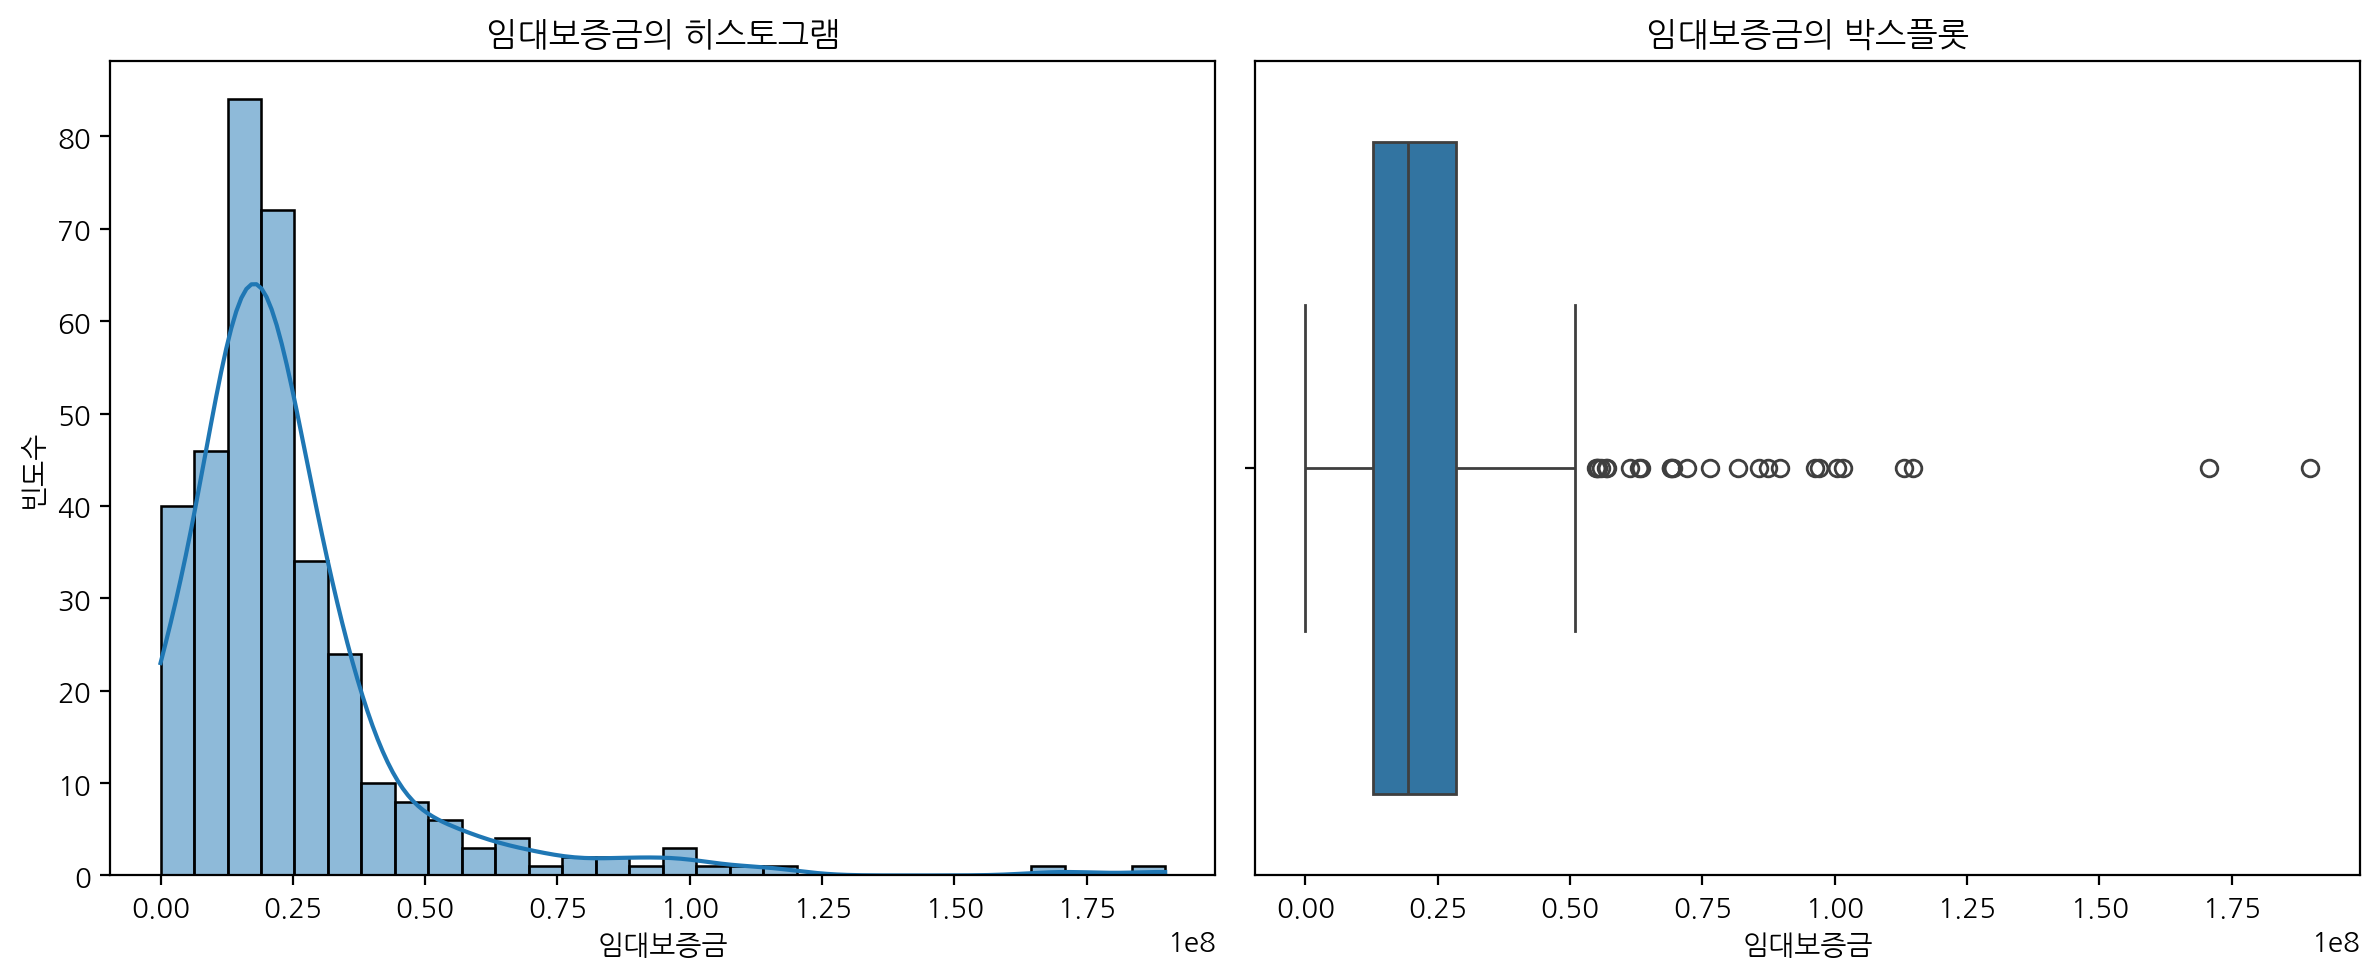

In [634]:
# 임대보증금
analyze_continuous(apart, '임대보증금')

# 분석
# 히스토그램 분포를 보면 데이터가 우측으로 치우쳐 있는 걸 통해 상대적으로 많은 데이터가 낮은 값에 집중되는 것을 볼 수 있습니다. 
# 박스플롯을 통해 이상치가 많이 존재하는 것을 볼 수 있습니다. 

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [636]:
# 함수 만들기
def analyze_categorical(df, column):
    # 카운트플롯 출력
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"{column}의 데이터 분포")
    plt.xlabel(column)
    plt.ylabel('빈도수')
    plt.xticks(rotation=45)  # x축 레이블 회전 (필요 시)
    plt.tight_layout()
    plt.show()

#### 1) 지역

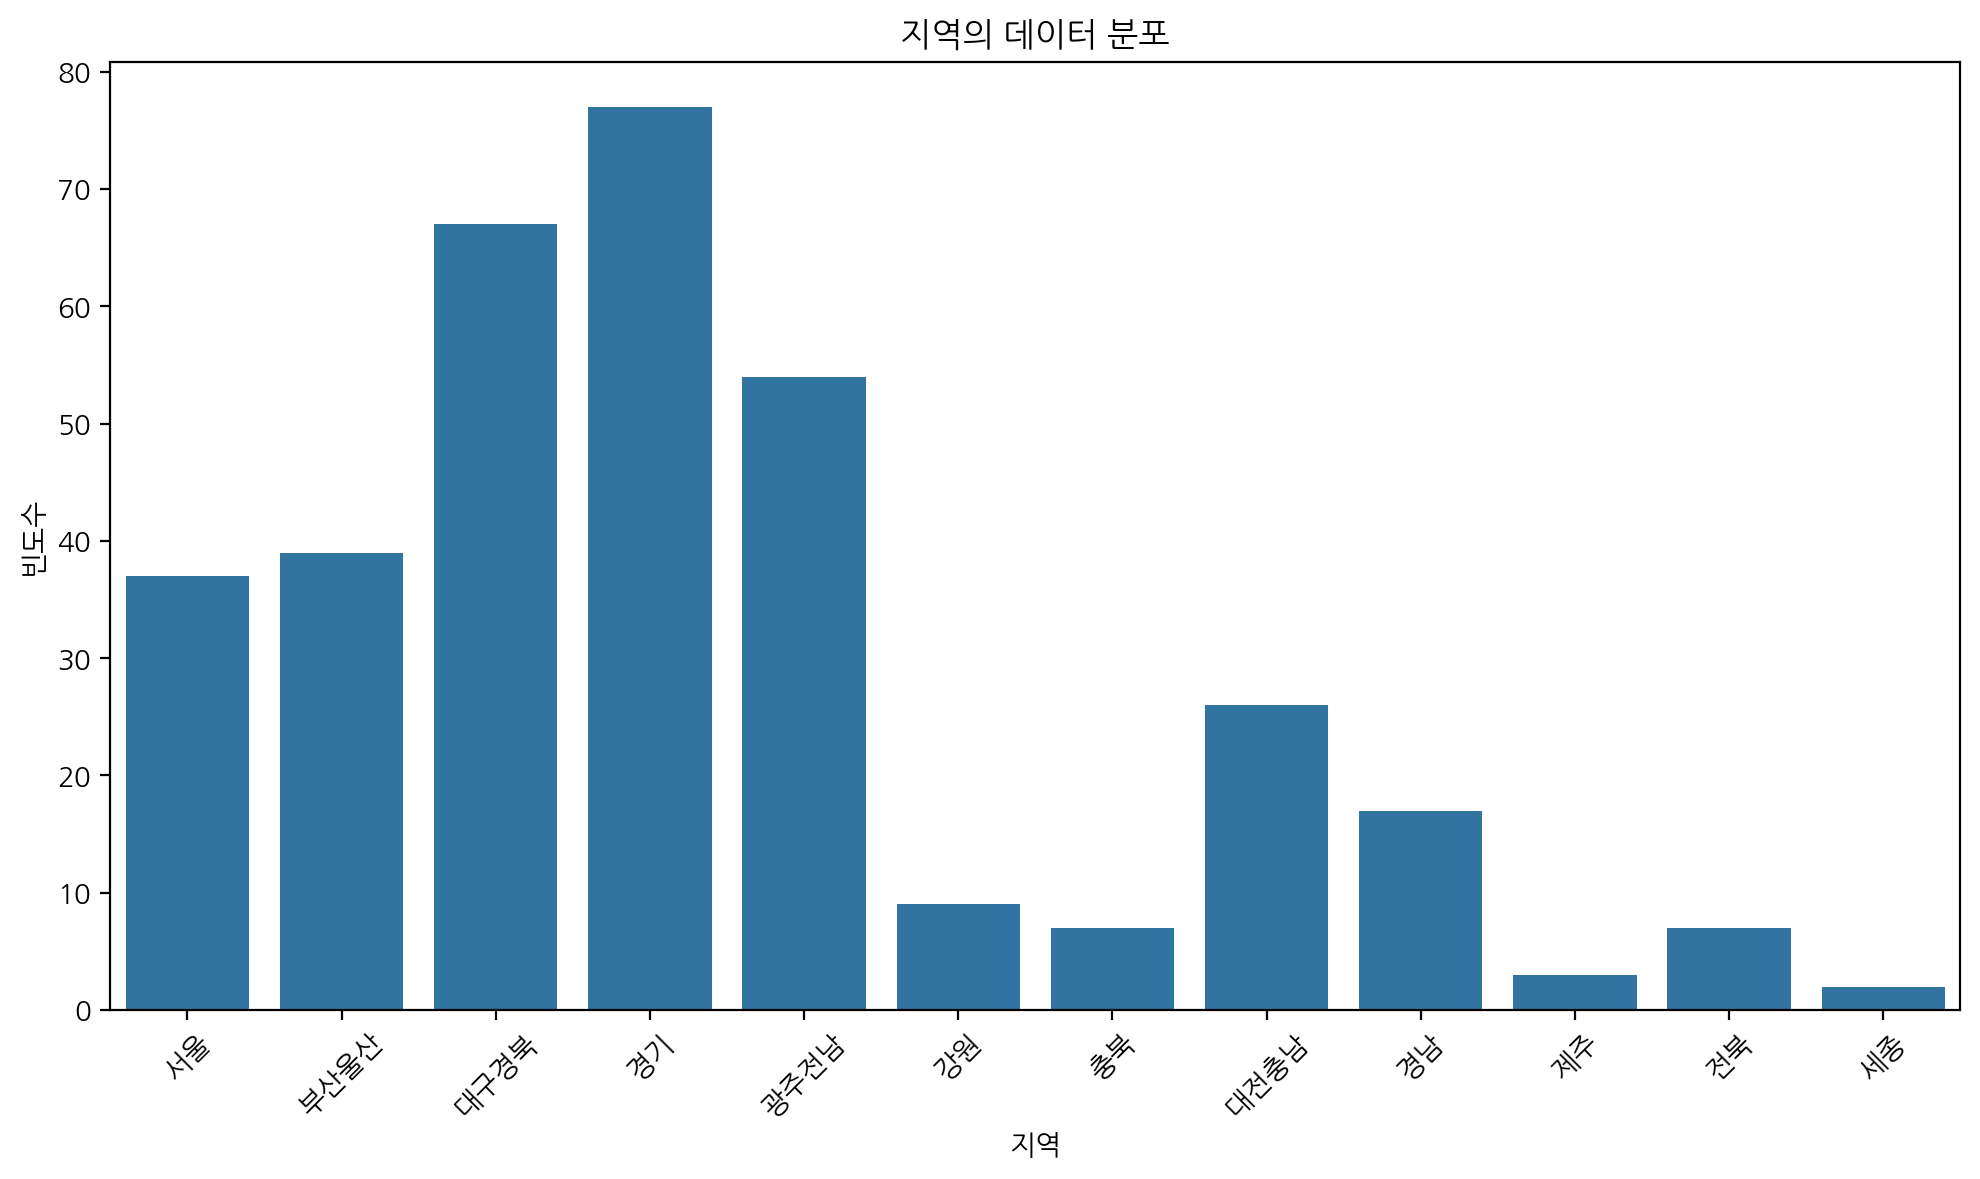

In [638]:
# 지역 
analyze_categorical(apart, '지역')

# 분석
# 지역 데이터 분포를 보면 경기도, 대구경북, 광주전남 순으로 가장 높고 세종, 제주, 충북 순으로 낮은 것을 볼 수 있습니다.  

#### 2) 건물형태

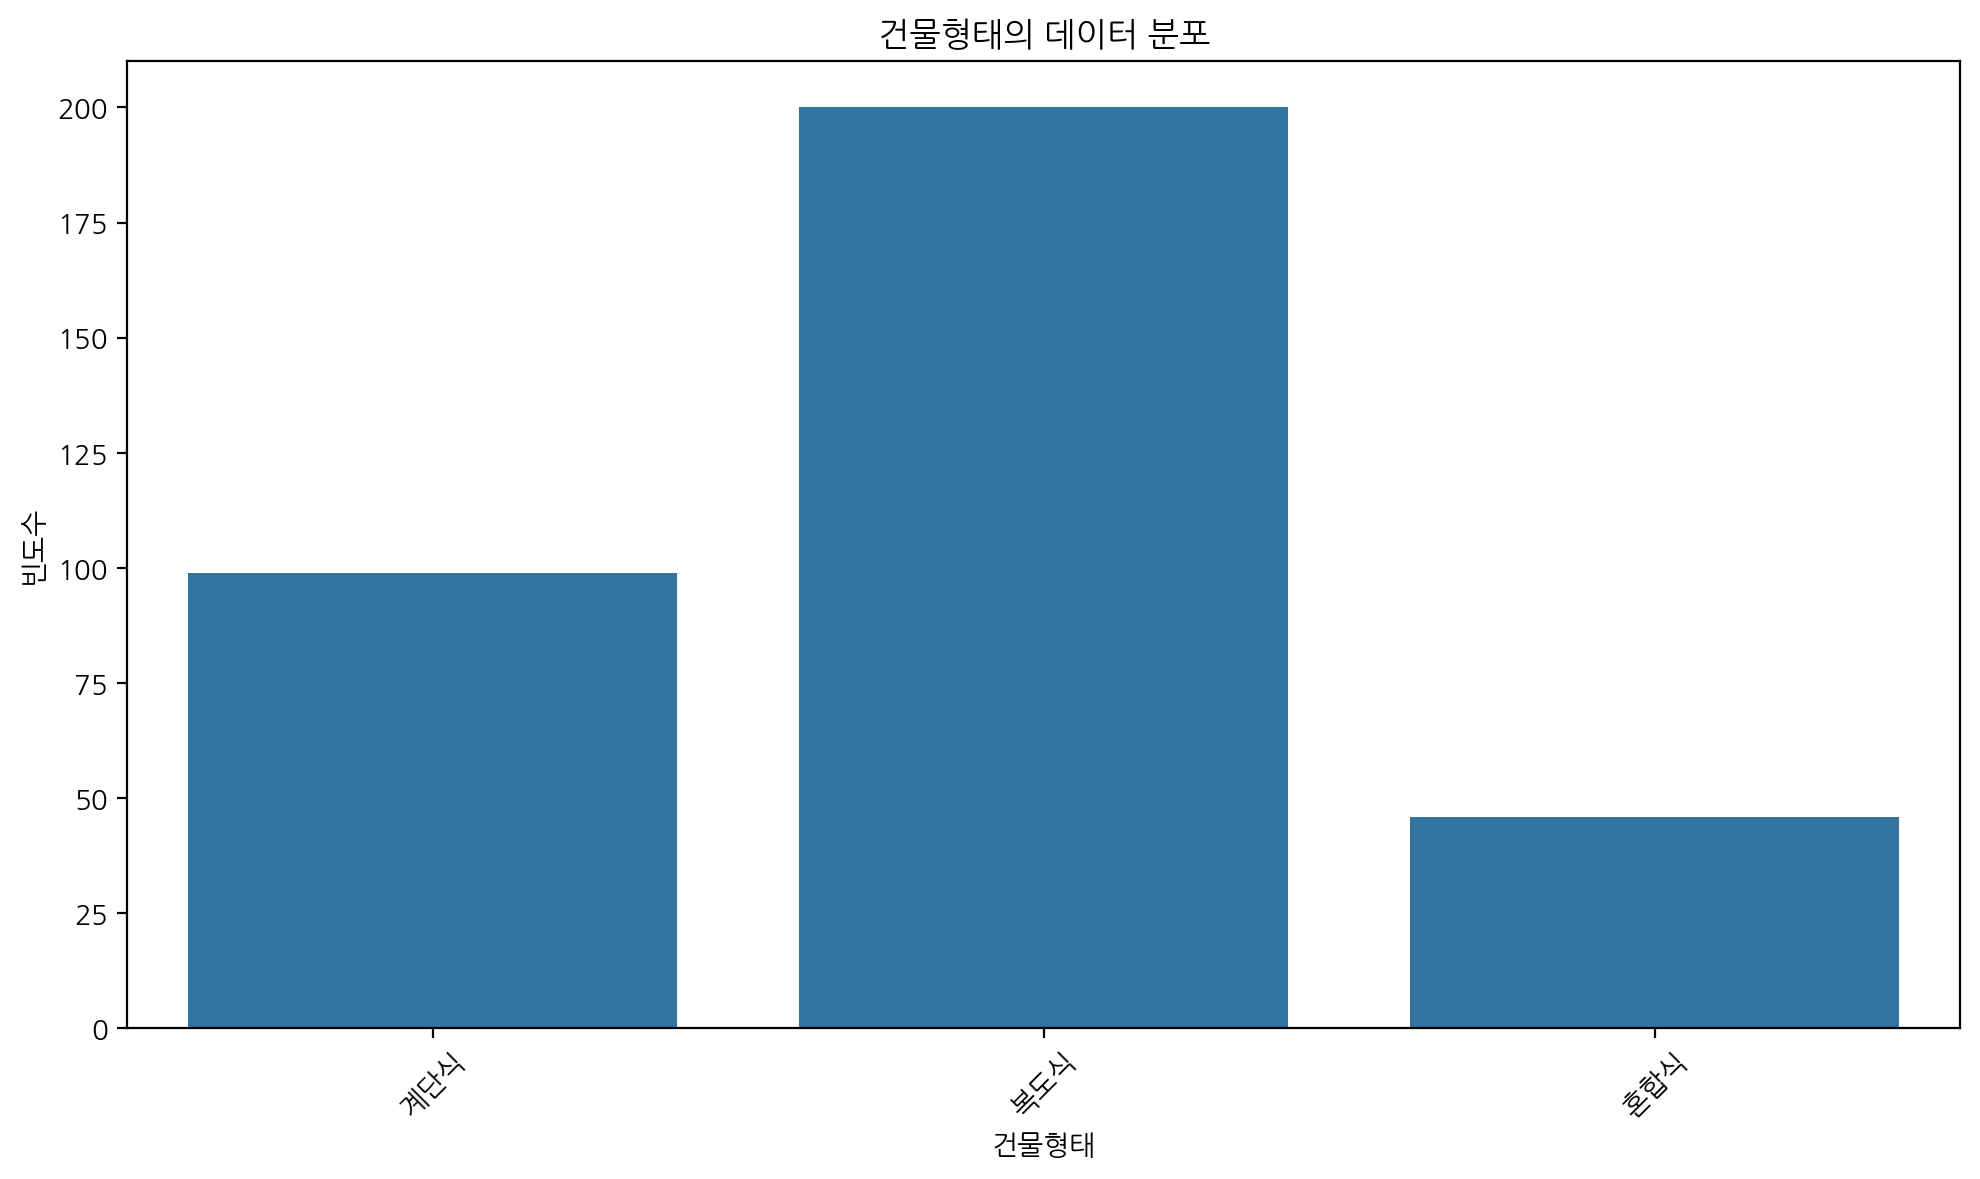

In [640]:
# 건물형태 
analyze_categorical(apart, '건물형태')

# 분석
# 건물형태를 보면 복도식이 가장 많고 그 다음으로 계단식, 혼합식인 것을 볼 수 있습니다. 

#### 3) 난방방식

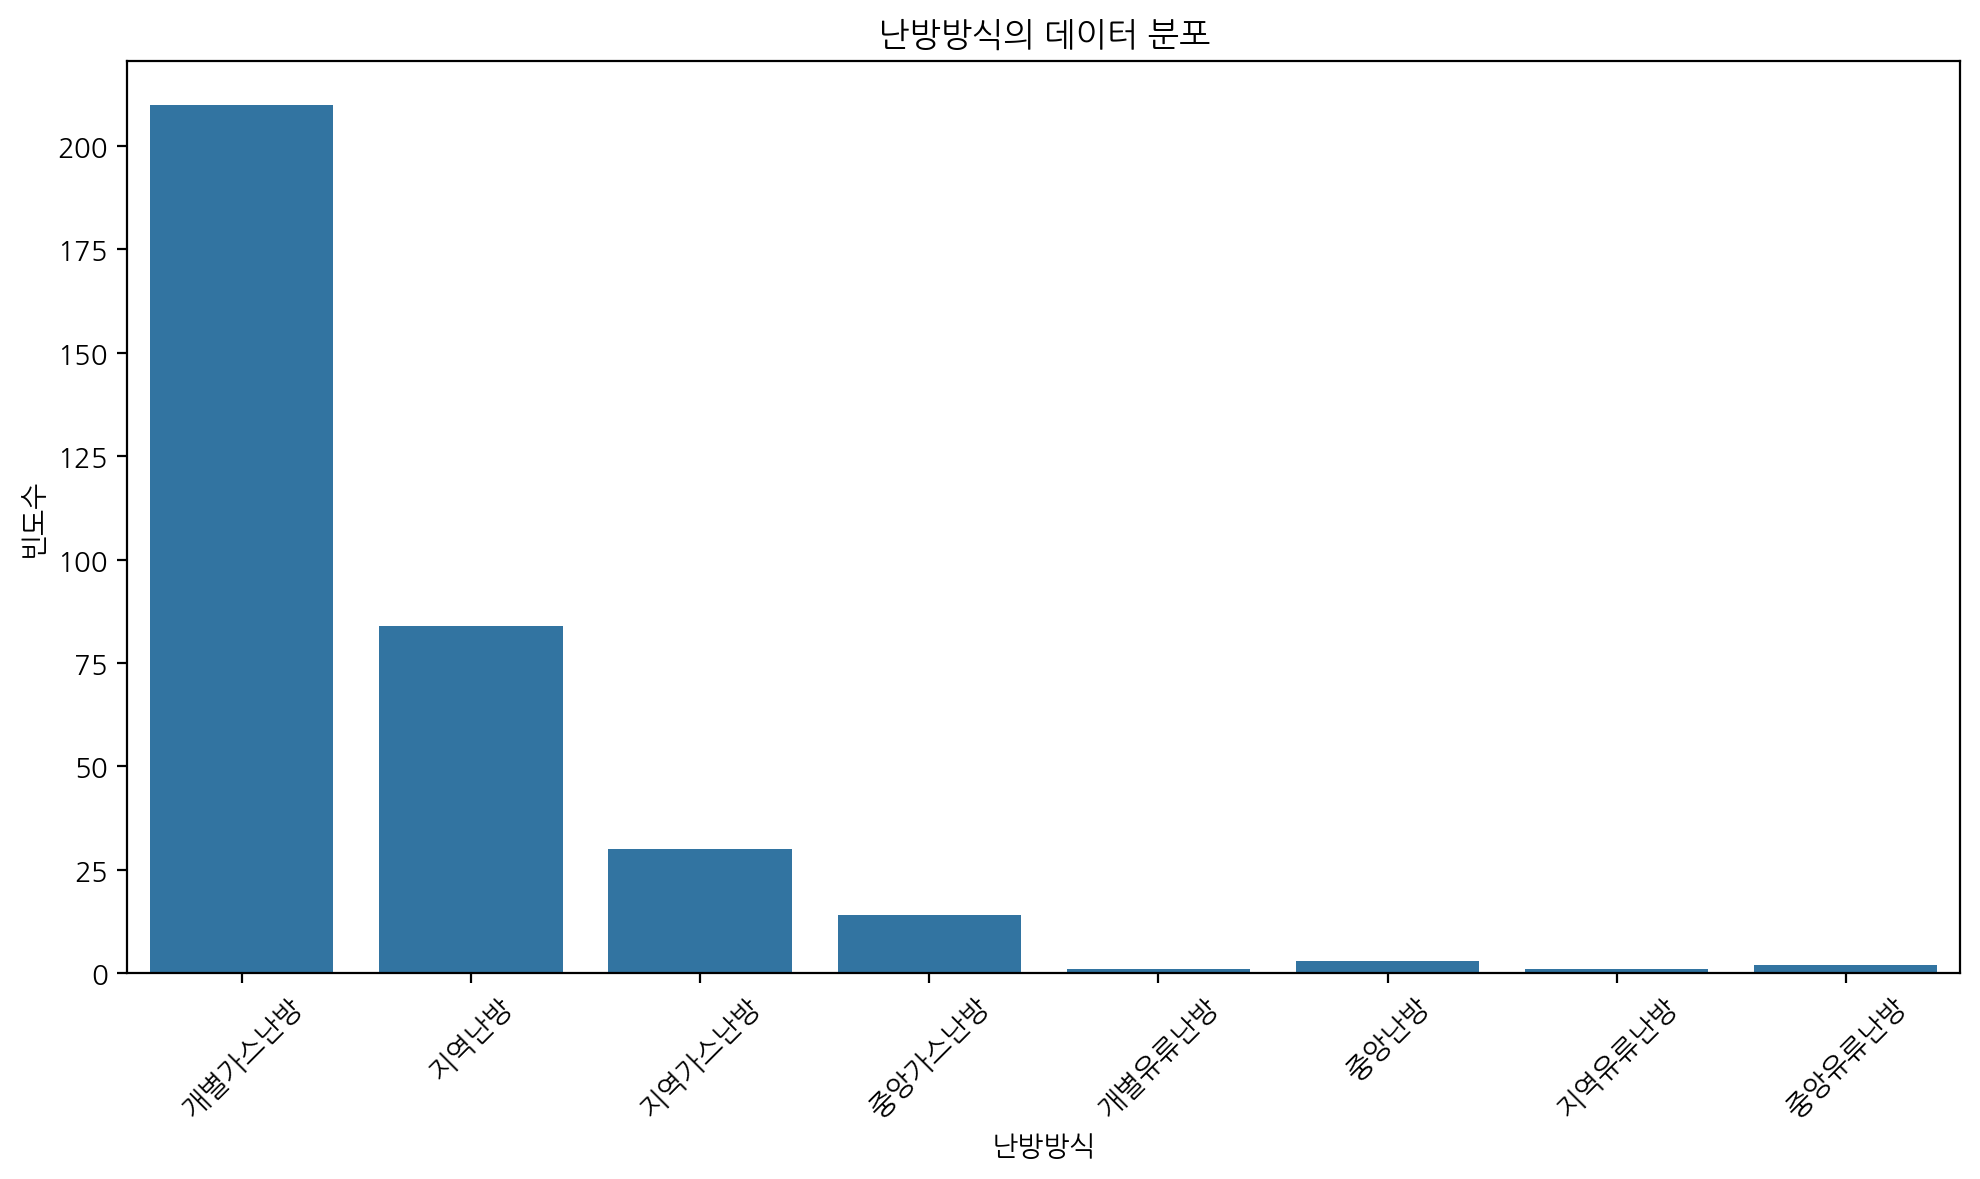

In [642]:
# 난방방식
analyze_categorical(apart, '난방방식')

# 분석 
# 난방방식 데이터의 분포를 보면 개별가스난방이 압도적으로 높은 것을 볼 수 있습니다. 
# 난방방식 데이터의 분포를 보면 개별유류난방, 지역유류난방이 가장 낮은 것으로 볼 수 있습니다. 

#### 4) 승강기설치여부

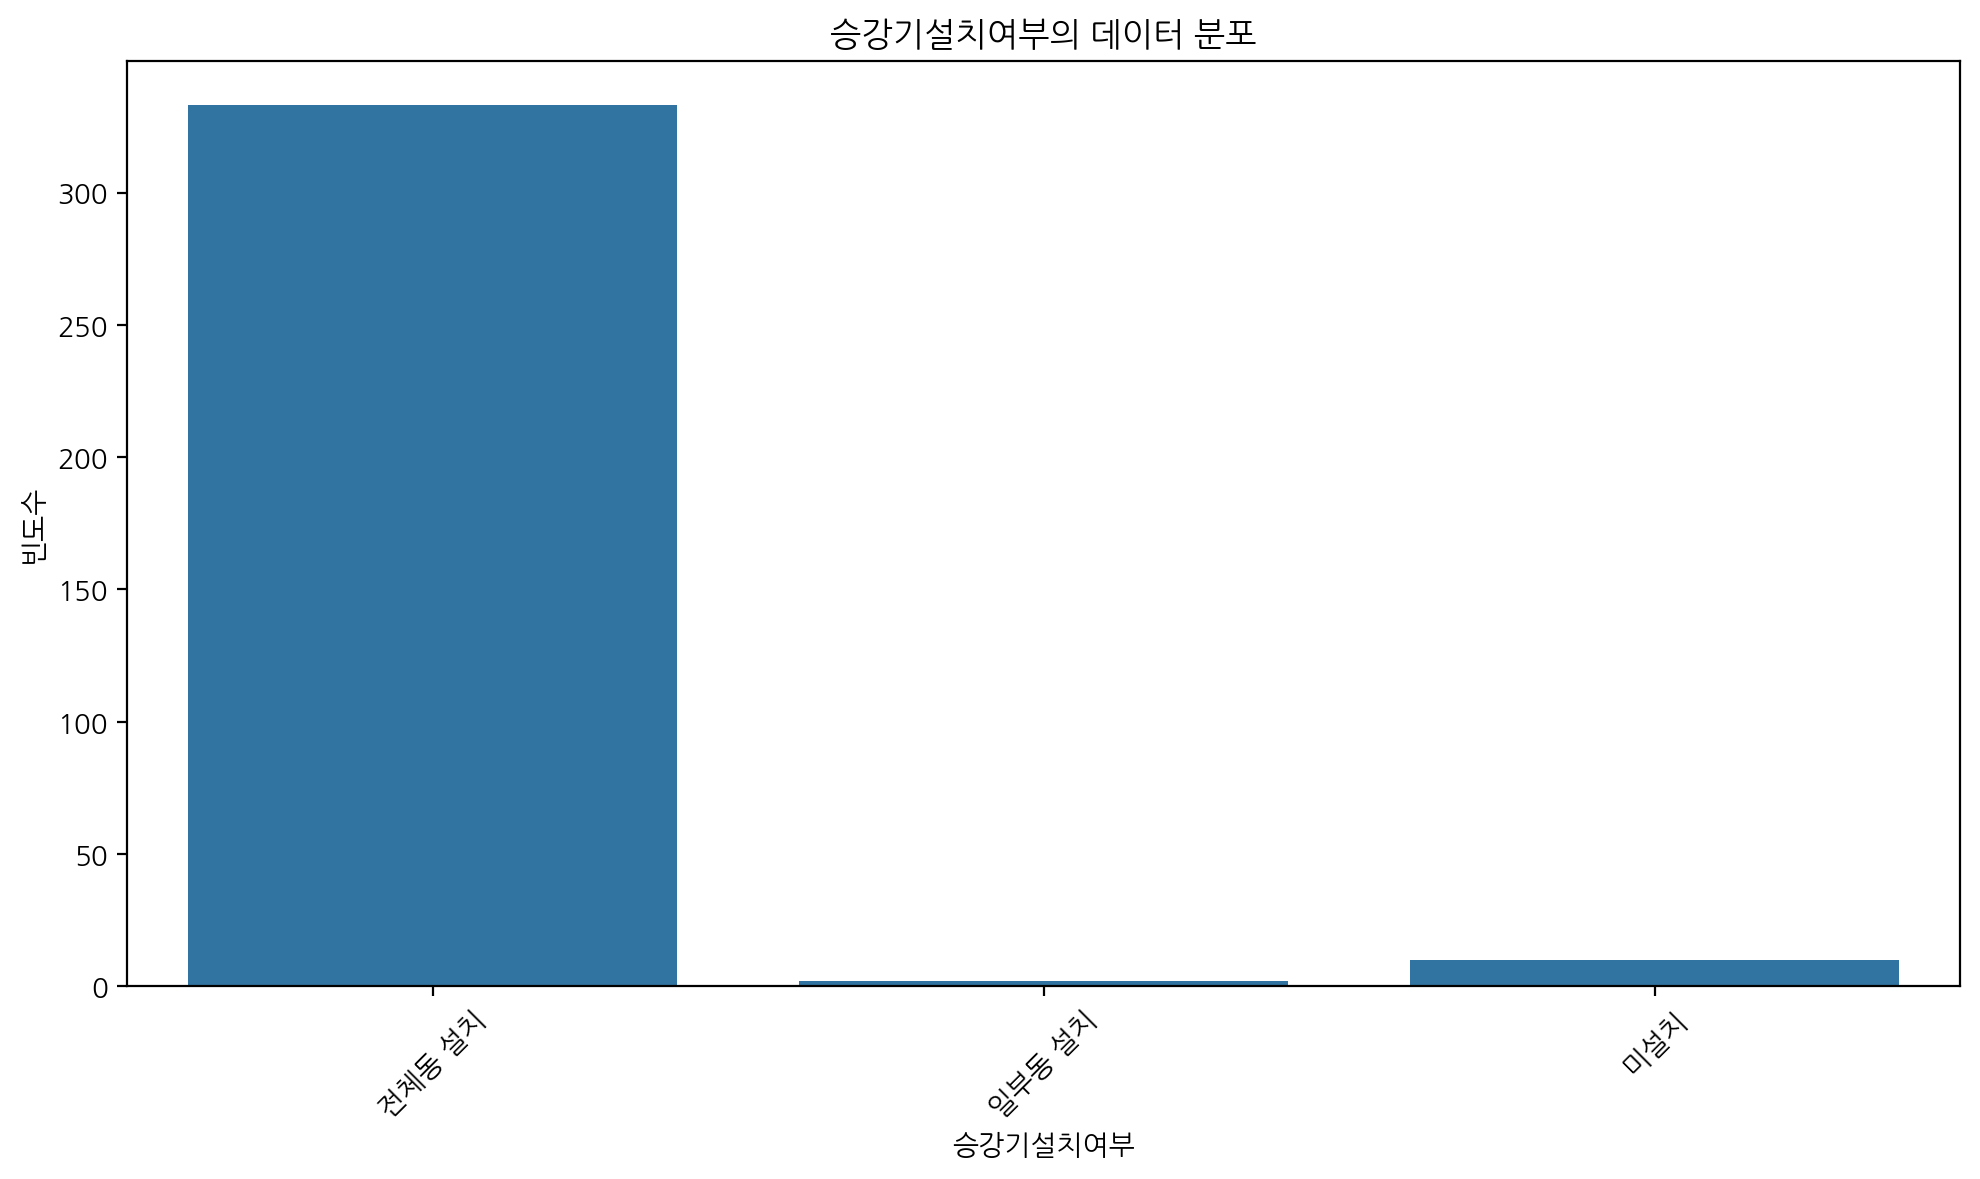

In [644]:
# 승강기설치여부 
analyze_categorical(apart, '승강기설치여부')

# 분석
# 승강기설치여부 데이터의 분포를 보면 전체동설치가 압도적으로 높은 것을 볼 수 있습니다. 
# 승강기설치여부 데이터의 분포를 보면 일부동 설치가 가장 낮은 걸로 볼 수 있습니다. 

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [652]:
# 전용면적 구간 관련 열을 선택
area_columns = ['면적0_10', '면적10_30', '면적30_40', '면적40_50', '면적50_60', 
                '면적60_70', '면적70_80', '면적80_200']

# melt 함수를 사용하여 DataFrame을 길게 변환
melted_df = pd.melt(apart, id_vars=['단지코드', '총세대수'], value_vars=area_columns, var_name='전용면적구간', value_name='세대수')

# 전용면적구간별 세대수 집계
grouped_df = melted_df.groupby('전용면적구간')['세대수'].sum().reset_index()

# 결과 출력
grouped_df


# 분석
# 전용면적구간의 데이터 분포를 보면 면적30_40이 가장 높은 수치를 보입니다. 
# 전용면적구간의 데이터 분포를 보면 면적0_10은 세대수가 아예 없는 것을 볼 수 있습니다. 

,전용면적구간,세대수
0,면적0_10,0
1,면적10_30,15814
2,면적30_40,58425
3,면적40_50,50929
4,면적50_60,45847
5,면적60_70,639
6,면적70_80,5829
7,면적80_200,11908


## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

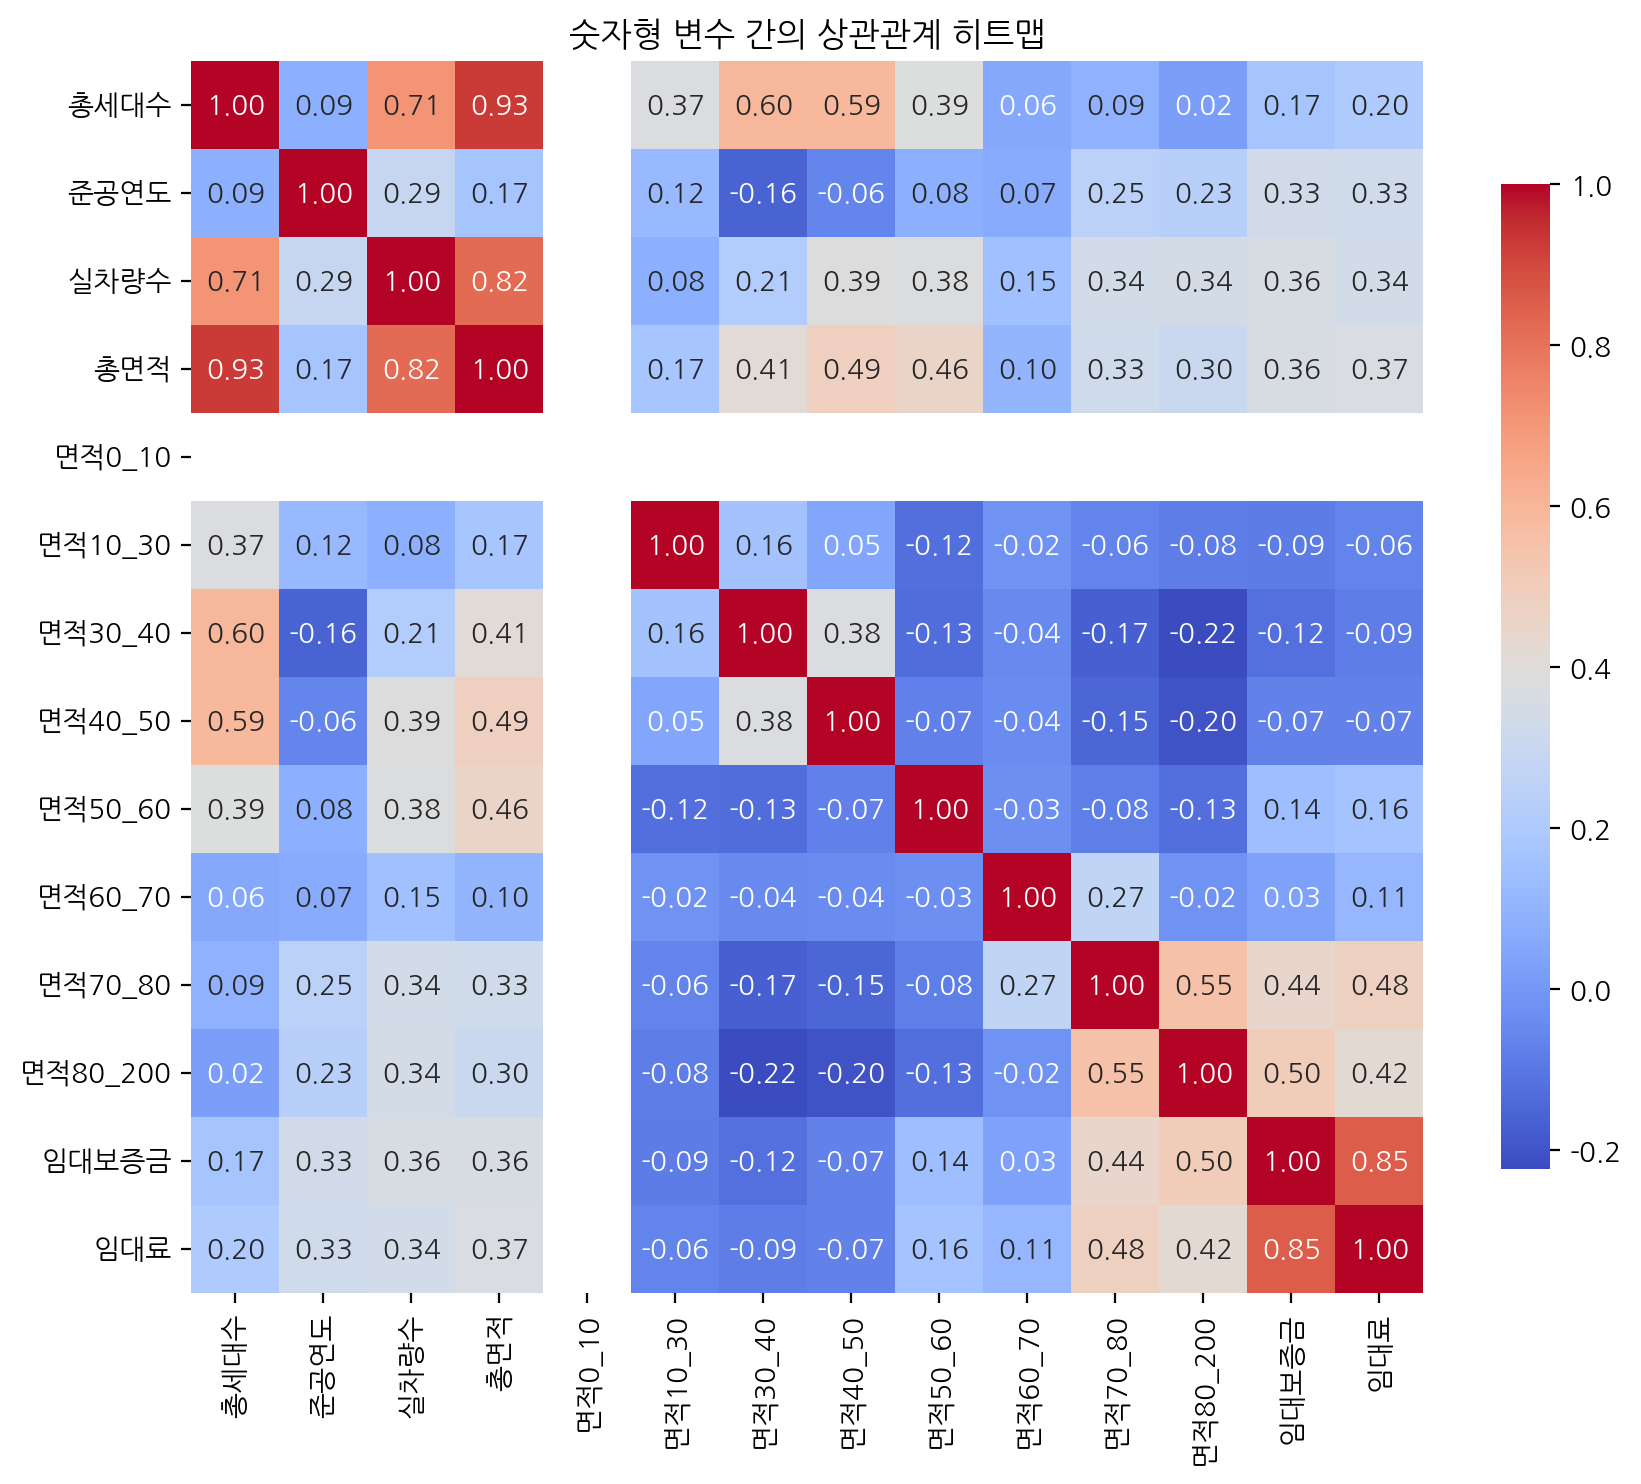

In [656]:
# 숫자형 변수 간의 상관관계 분석
correlation_matrix = apart.corr(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('숫자형 변수 간의 상관관계 히트맵')
plt.show()

# 실차량수와 강한 관계를 갖는 변수: 총면적, 총세대수
# 실차량수와 중간 관계를 갖는 변수: '면적40-50', '면적50-60', '임대보증금'

In [657]:
high_corr_vars = correlation_matrix['실차량수'].abs().nlargest(6).index.tolist()
high_corr_vars.remove('실차량수')  # 자기 자신 제거
high_corr_vars

['총면적', '총세대수', '면적40_50', '면적50_60', '임대보증금']

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [659]:
# 함수 만들기
def plot_scatter(data, x_var, y_var):
    plt.figure(figsize=(8, 6))
    
    # 산점도
    sns.scatterplot(data=data, x=x_var, y=y_var)
    
    # 회귀선 추가
    sns.regplot(data=data, x=x_var, y=y_var, scatter=False, color='red')
    
    plt.title(f'{y_var} vs {x_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    
    # 레전드 추가
    plt.legend(['회귀선'])
    
    plt.grid()
    plt.show()

#### 1) 변수이름

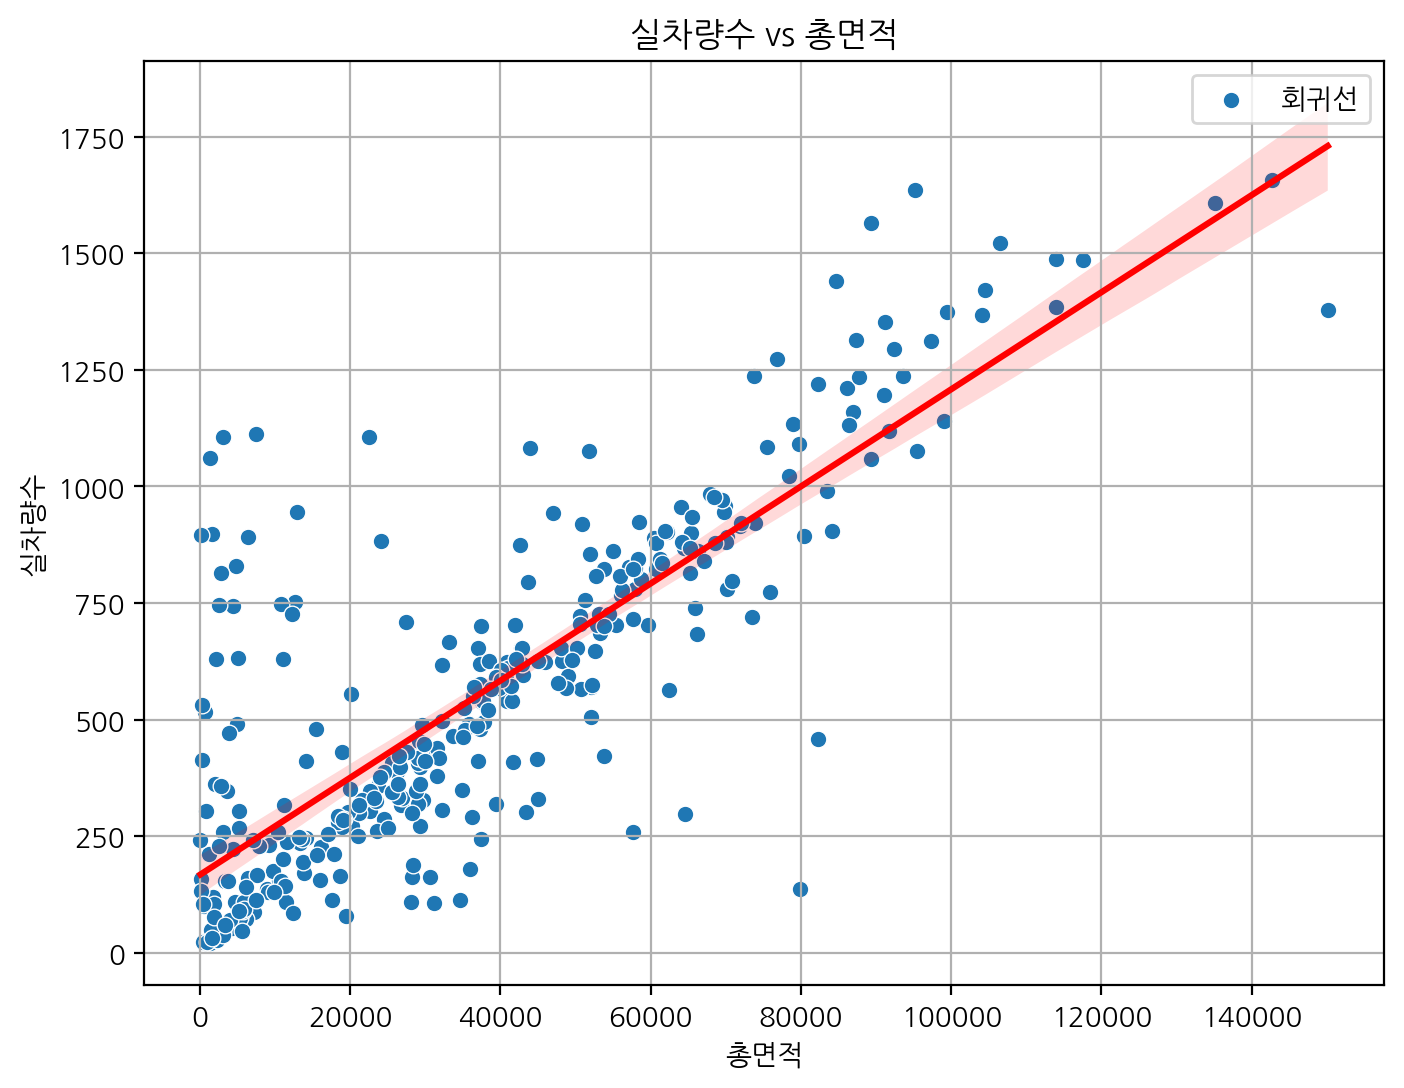

In [661]:
# 총면적 - 실차량수 관계
plot_scatter(apart, '총면적', '실차량수')

# 분석
# 총면적과 실차량수는 양의 상관관계를 갖는 것을 볼 수 있습니다. 
# 총면적의 값이 클수록 실차량수의 값도 커지는 것을 볼 수 있습니다. 
# 거의 회귀선 근처에 값들이 분포하는 것을 보아 강한 상관관계로 볼 수 있습니다. 

#### 2) 변수이름

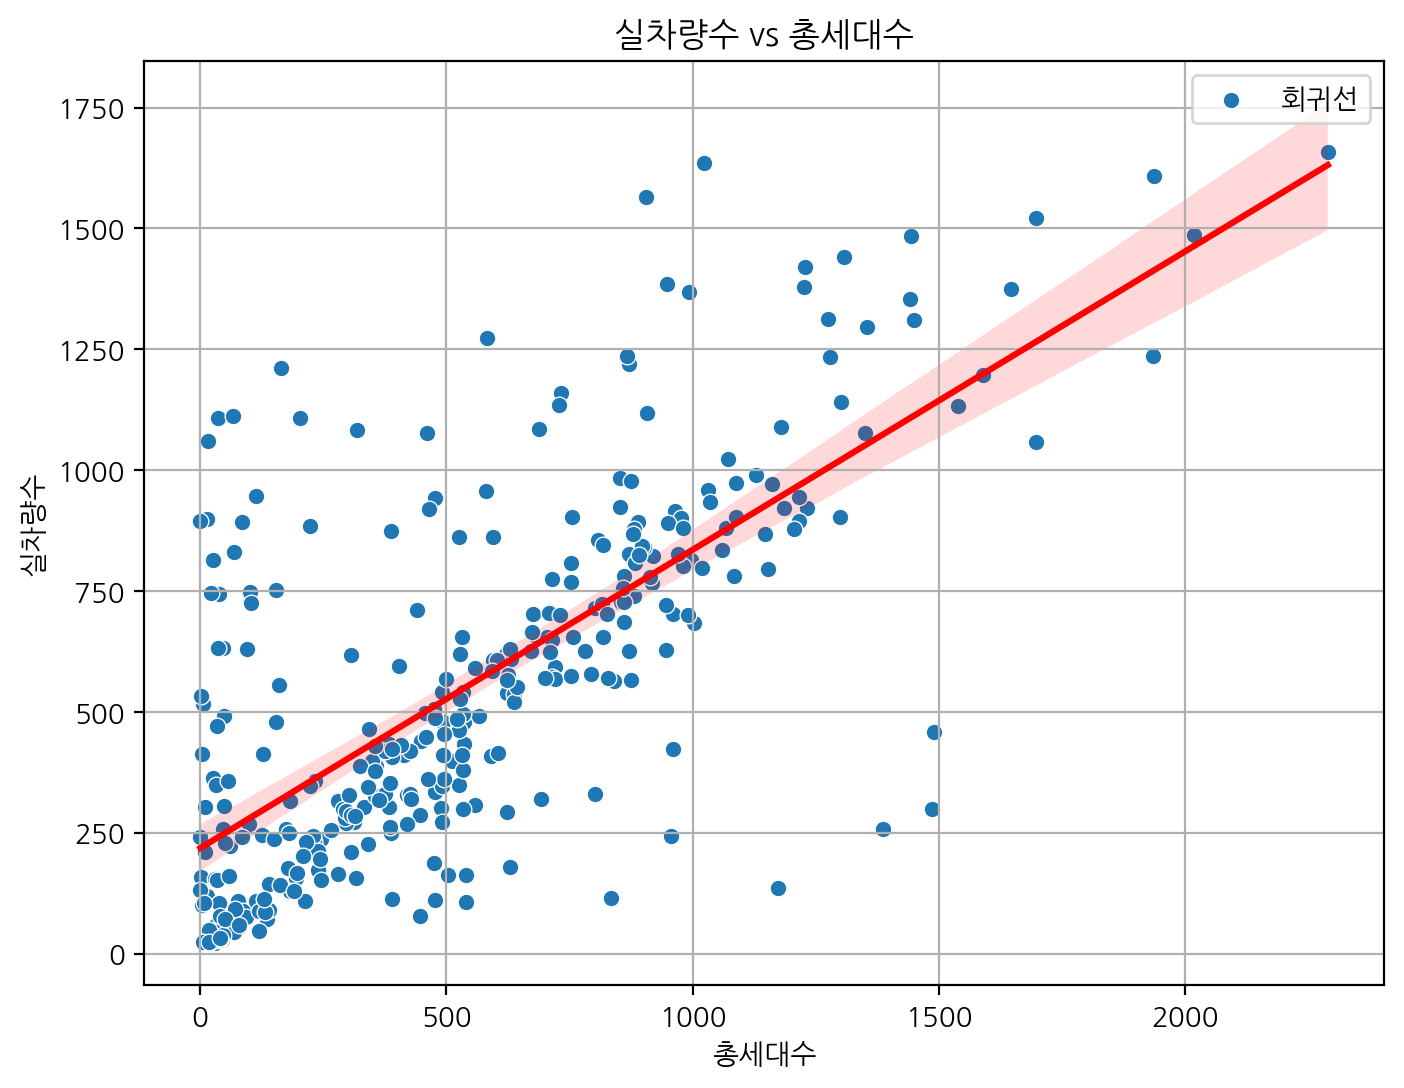

In [663]:
# 총세대수 - 실차량수 관계
plot_scatter(apart, '총세대수', '실차량수')

# 분석
# 총세대수와 실차량수는 양의 상관관계를 갖는 것을 볼 수 있습니다. 
# 총세대수의 값이 클수록 실차량수의 값도 커지는 것을 볼 수 있습니다. 
# 거의 회귀선 근처에 값들이 분포하는 것을 보아 강한 상관관계로 볼 수 있습니다. 

#### 3) 변수이름

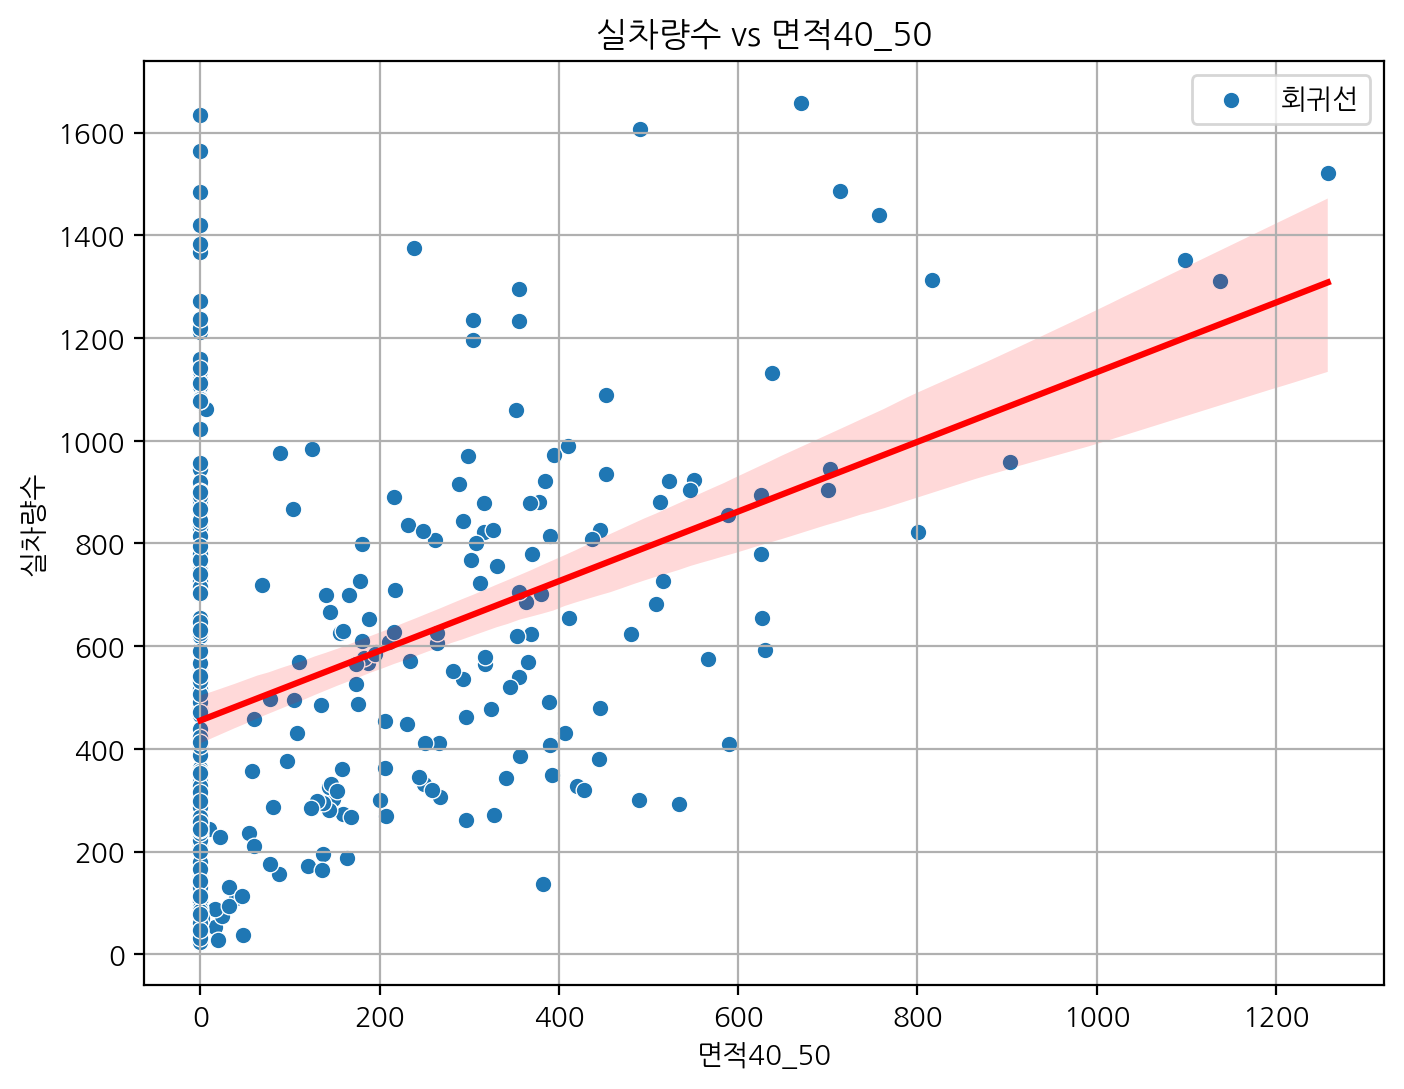

In [672]:
# 면적40-50 - 실차량수 관계
plot_scatter(apart, '면적40_50', '실차량수')

# 분석
# 면적40-50와 실차량수는 양의 상관관계를 갖는 것을 볼 수 있습니다. 
# 거의 회귀선 주변에 값들이 넓게 분포하는 것을 보아, 변수 간의 관계가 약하다고 판단됩니다. 

#### 4) 변수이름

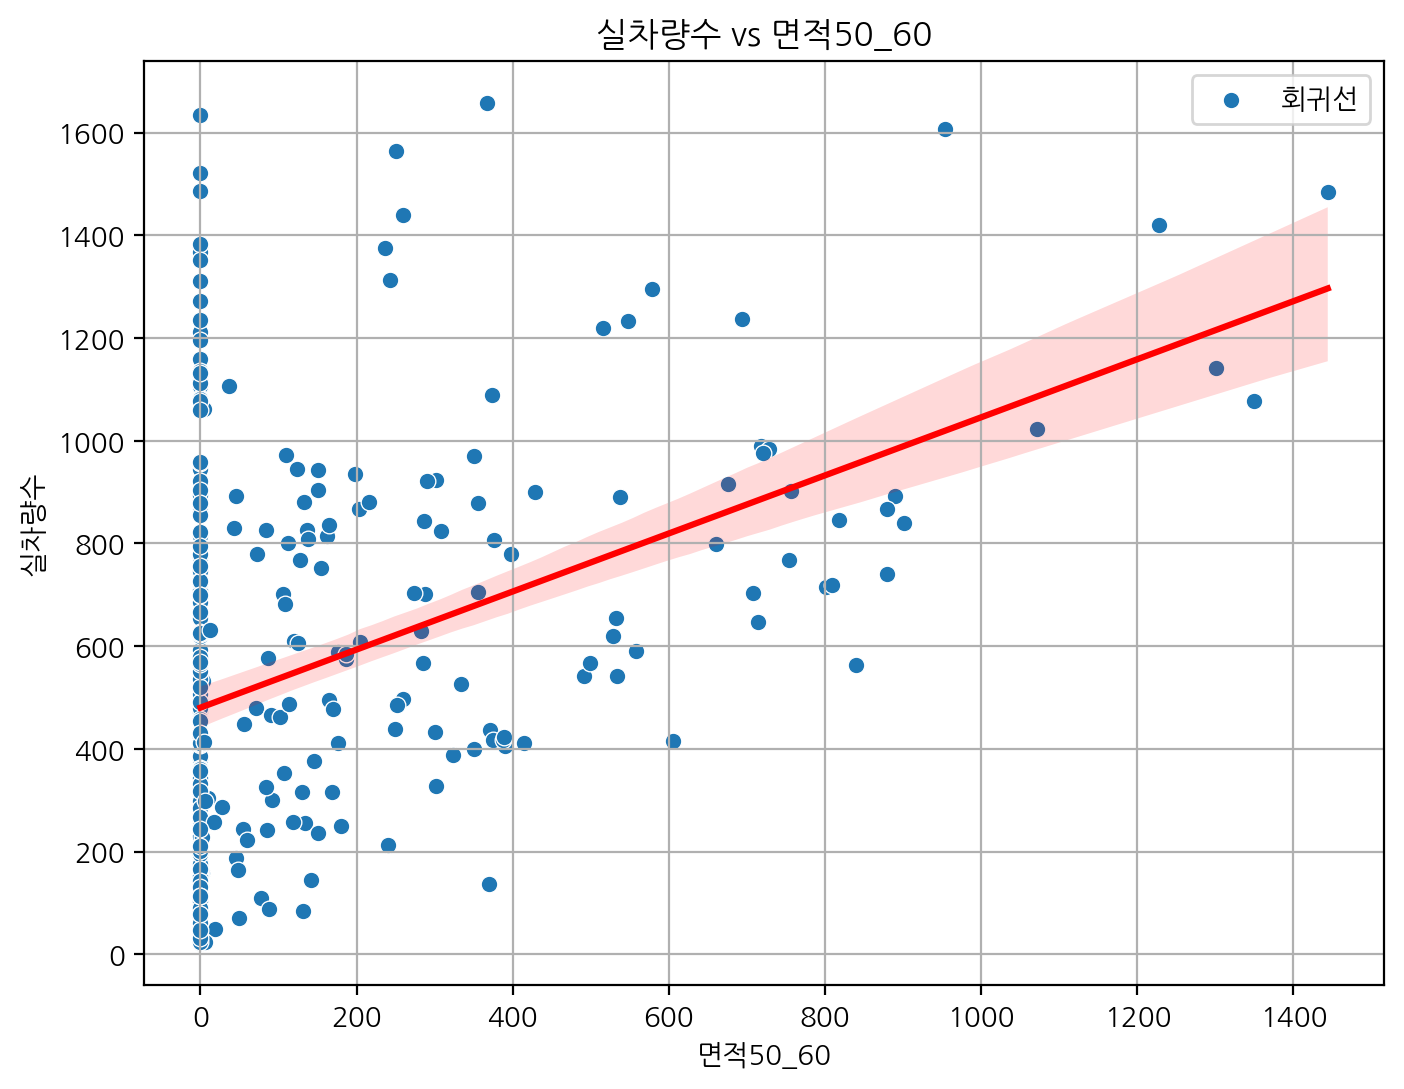

In [674]:
plot_scatter(apart, '면적50_60', '실차량수')

# 분석
# 면적50-60와 실차량수는 양의 상관관계를 갖는 것을 볼 수 있습니다. 
# 거의 회귀선 주변에 값들이 넓게 분포하는 것을 보아, 변수 간의 관계가 약하다고 판단됩니다. 

#### 5) 변수이름

In [676]:
# 다른 변수들과는 약한 상관관계를 가진다고 판단하여 상점도 분석을 하지 않았습니다. 

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [680]:
# 함수 만들기

def plot_bar(data, category_var):
    # 범주형 변수에 따라 실차량수의 평균 계산
    mean_values = data.groupby(category_var)['실차량수'].mean().reset_index()

    # 막대 그래프 그리기
    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_values, x=category_var, y='실차량수')
    plt.title(f'Average 실차량수 by {category_var}')
    plt.xlabel(category_var)
    plt.ylabel('Average 실차량수')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#### 1) 지역

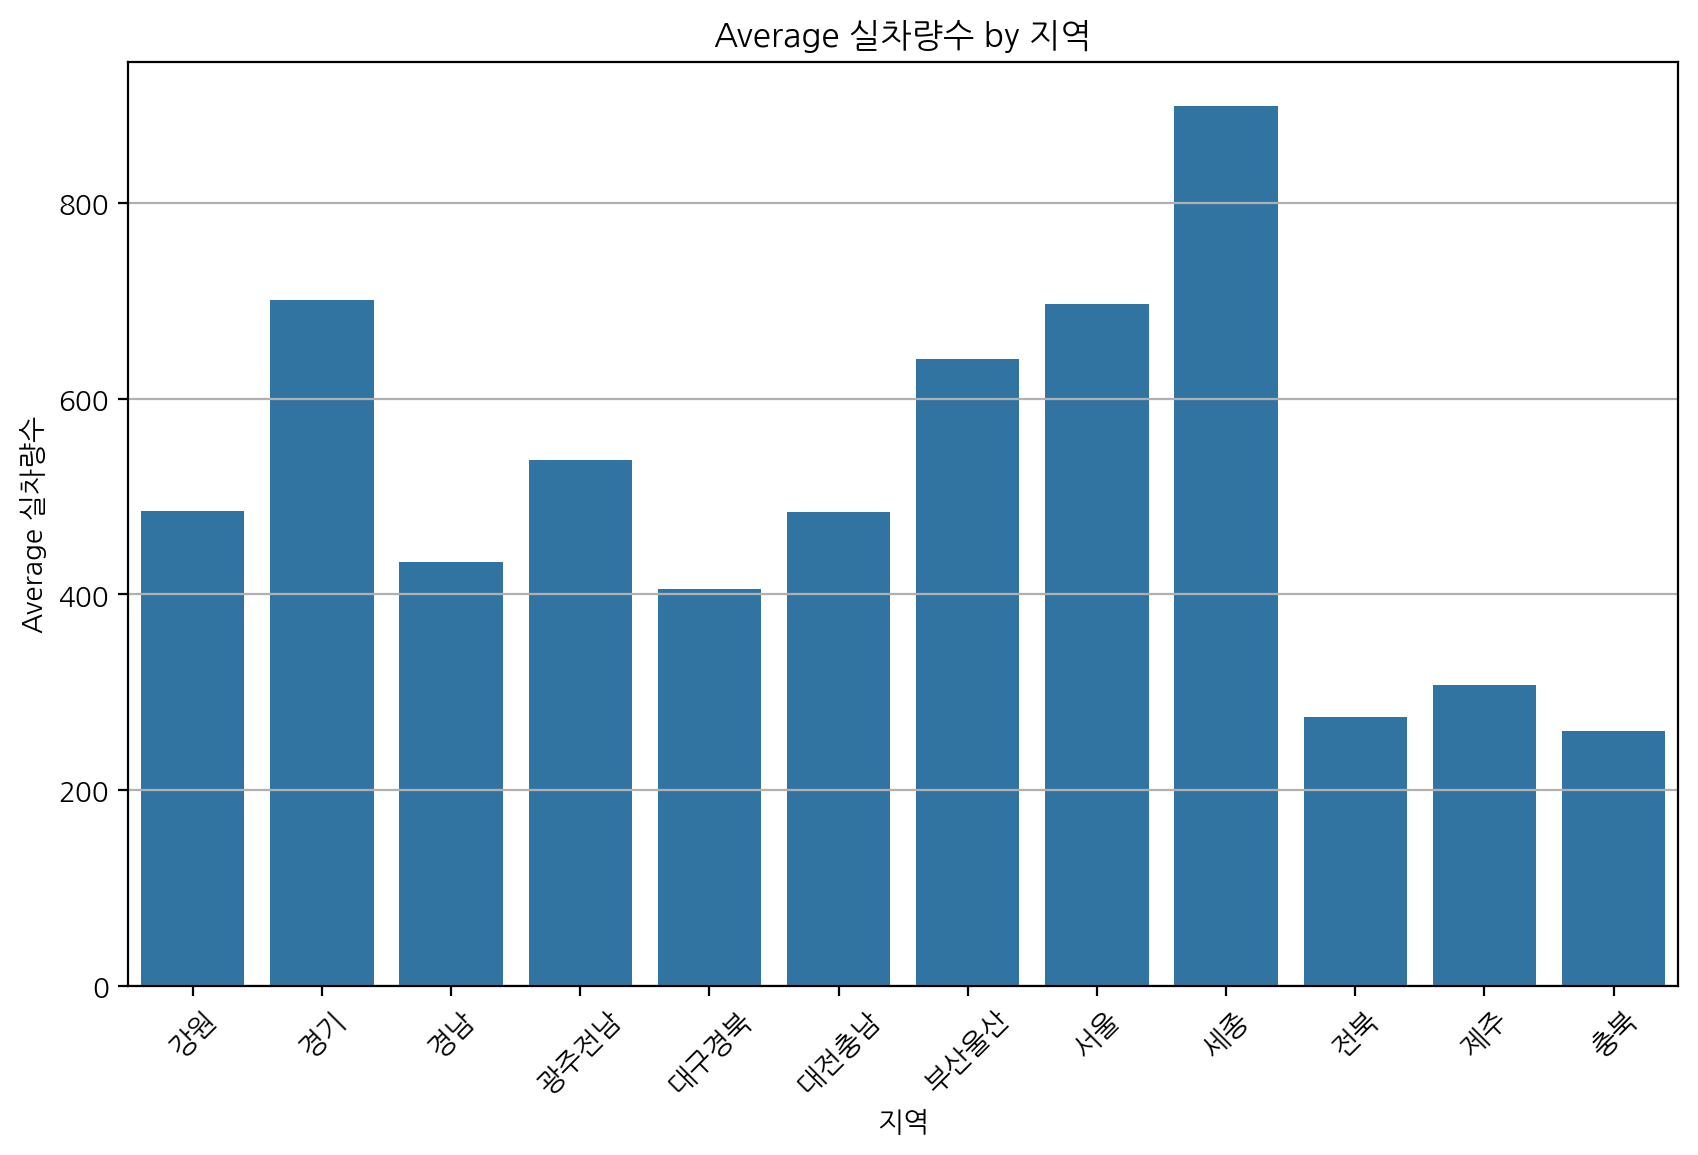

In [683]:
# 지역 - 실차량수 관계
plot_bar(apart, '지역')

# 분석
# 막대 그래프를 통해 세종이 실차량수가 가장 높고 충북, 전북, 제주가 가장 낮은 걸로 볼 수 있습니다. 

#### 2) 준공연도

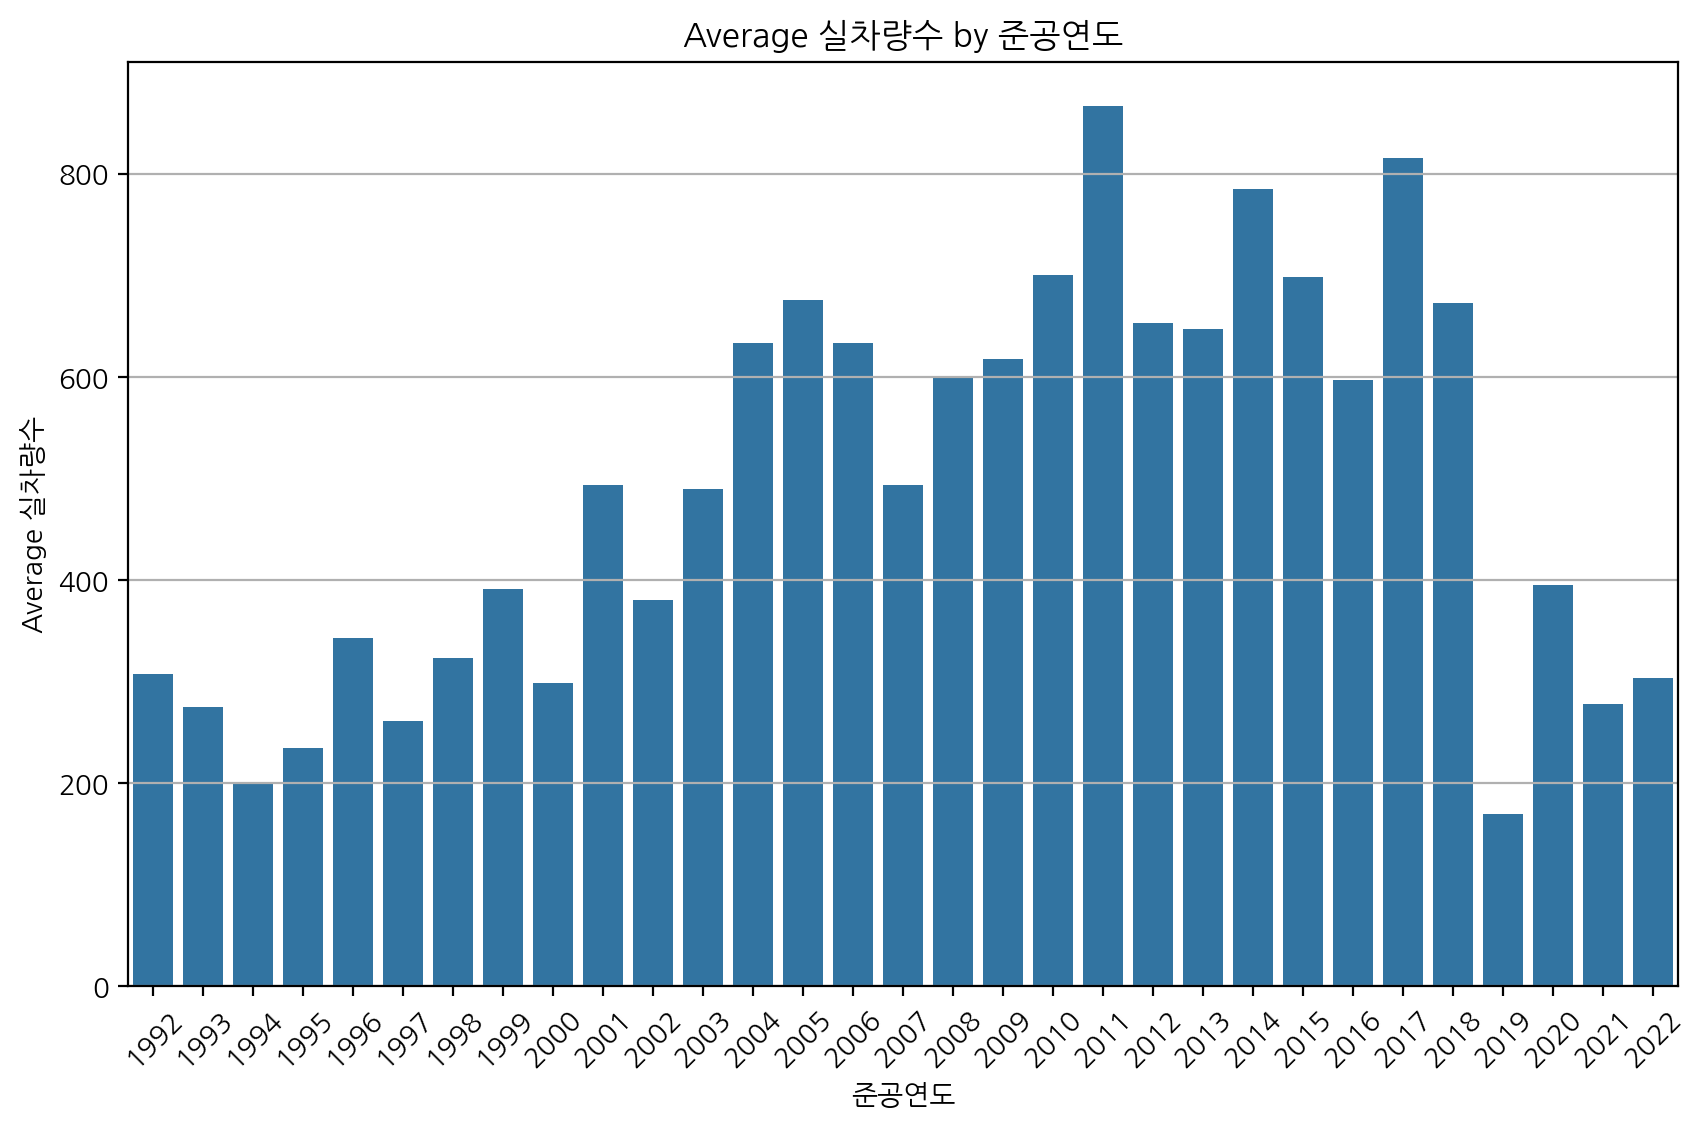

In [685]:
# 준공연도 - 실차량수 관계
plot_bar(apart, '준공연도')

# 분석
# 2011년도가 가장 높고 2019년때가 가장 낮은 것을 볼 수 있습니다. 

#### 3) 건물형태

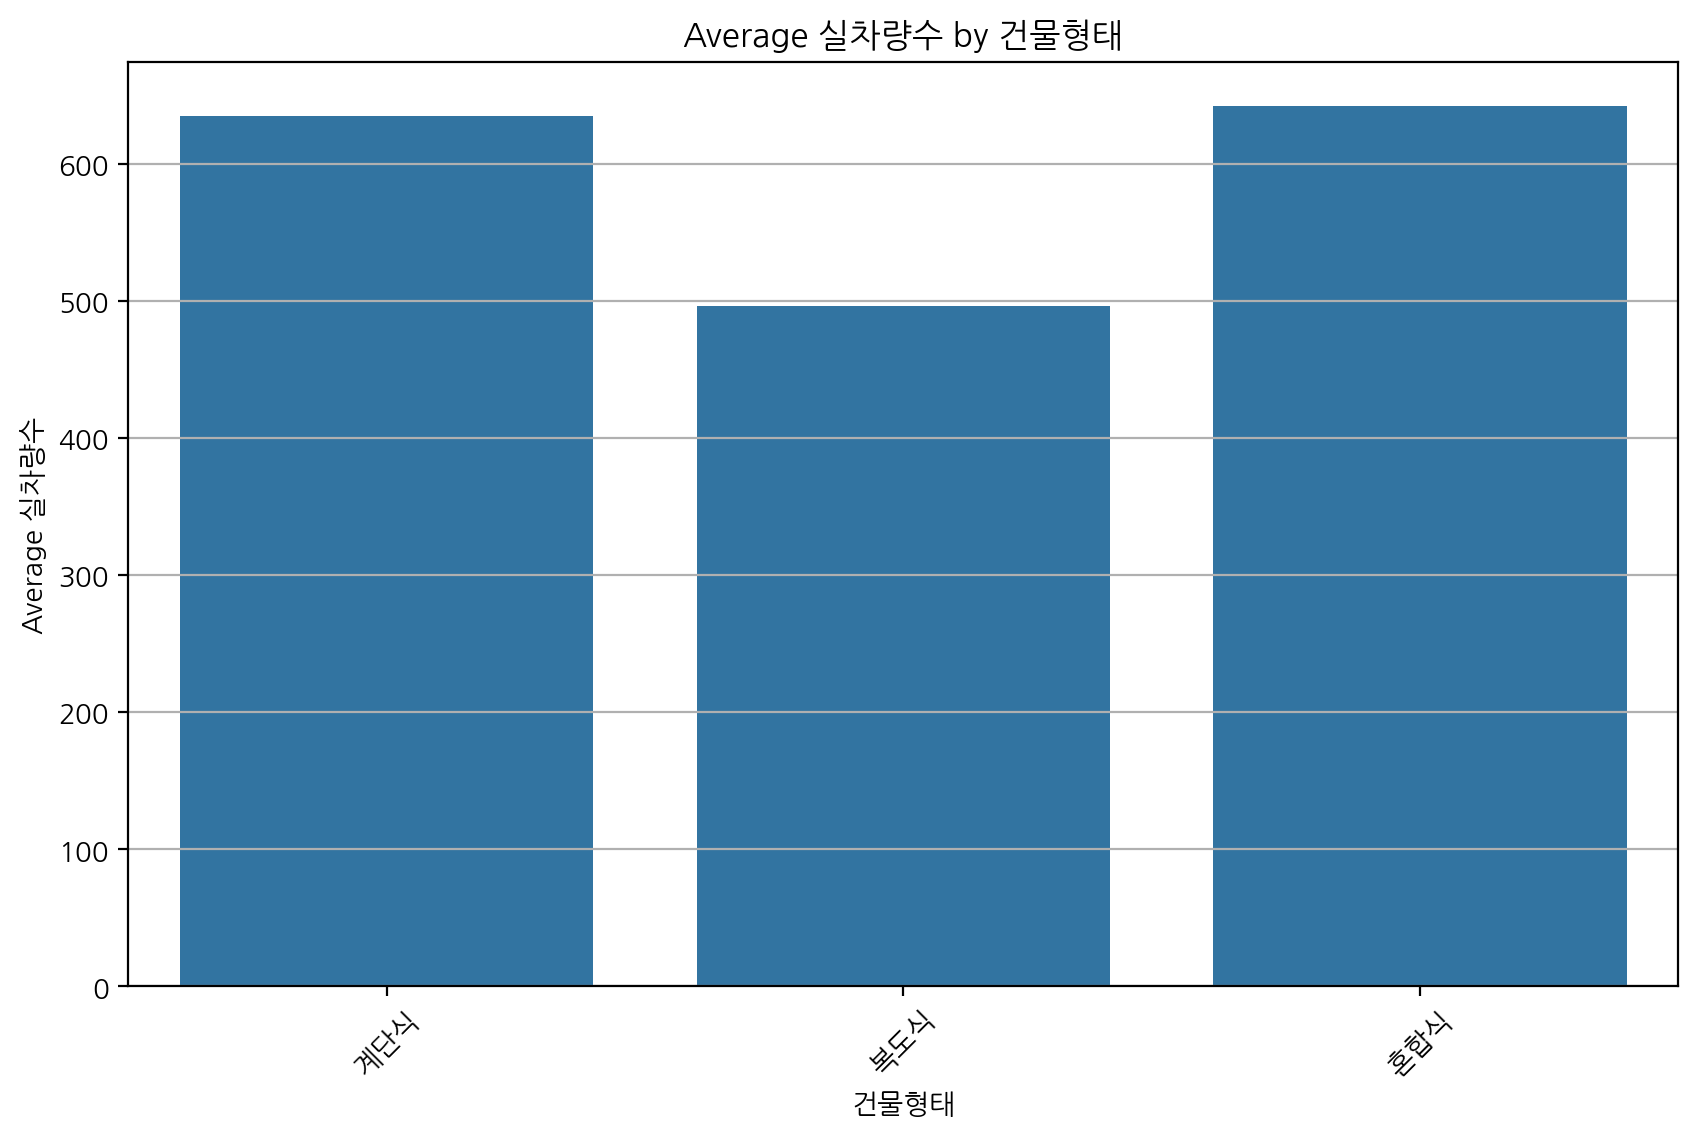

In [688]:
# 건물형태 - 실차량수 관계
plot_bar(apart, '건물형태')

# 분석
# 건물형태는 혼합식과 계단식이 거의 비슷한 비율로 가장 높고 복도식이 가장 낮은 것을 볼 수 있습니다. 

#### 4) 난방방식

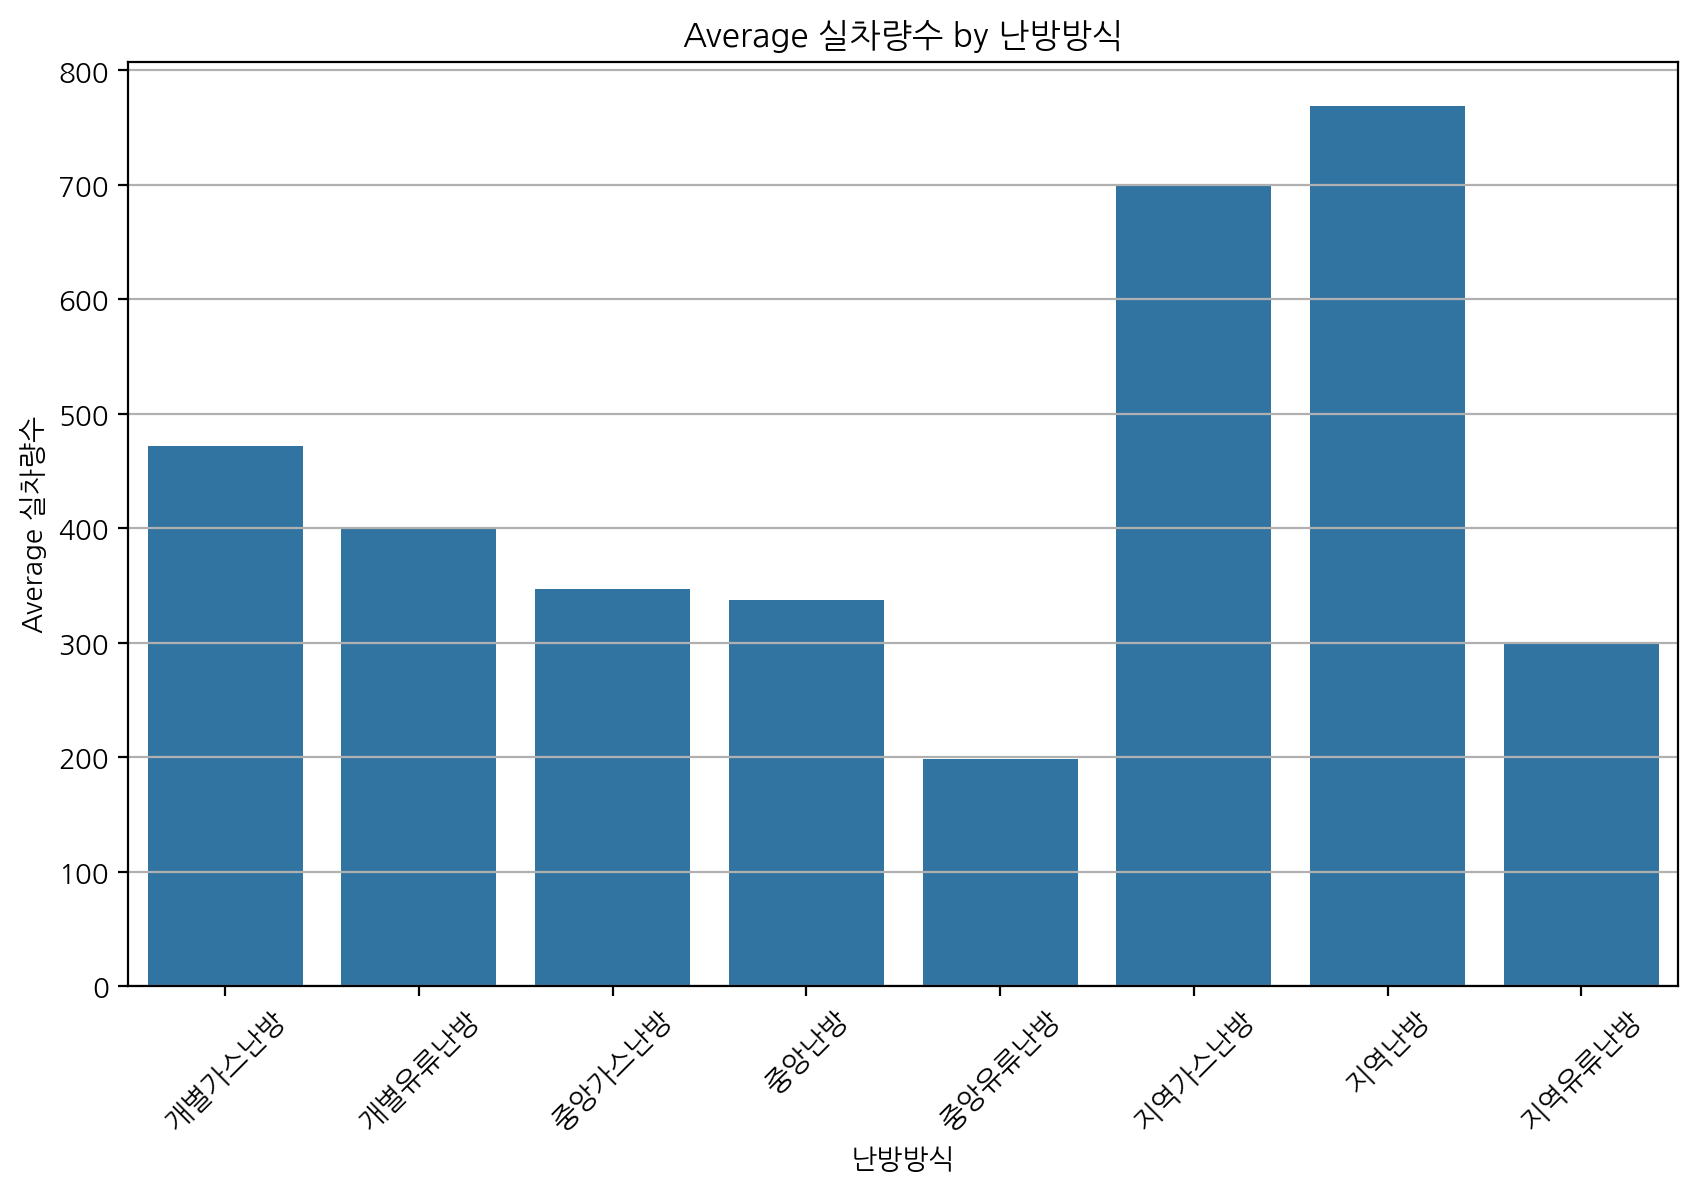

In [690]:
# 난방방식 - 실차량수 관계
plot_bar(apart, '난방방식')

# 분석
# 막대그래프를 통해 지역난방이 가장 많고 중앙유류난방이 가장 낮은 것으로 보입니다.

#### 5) 승강기설치여부

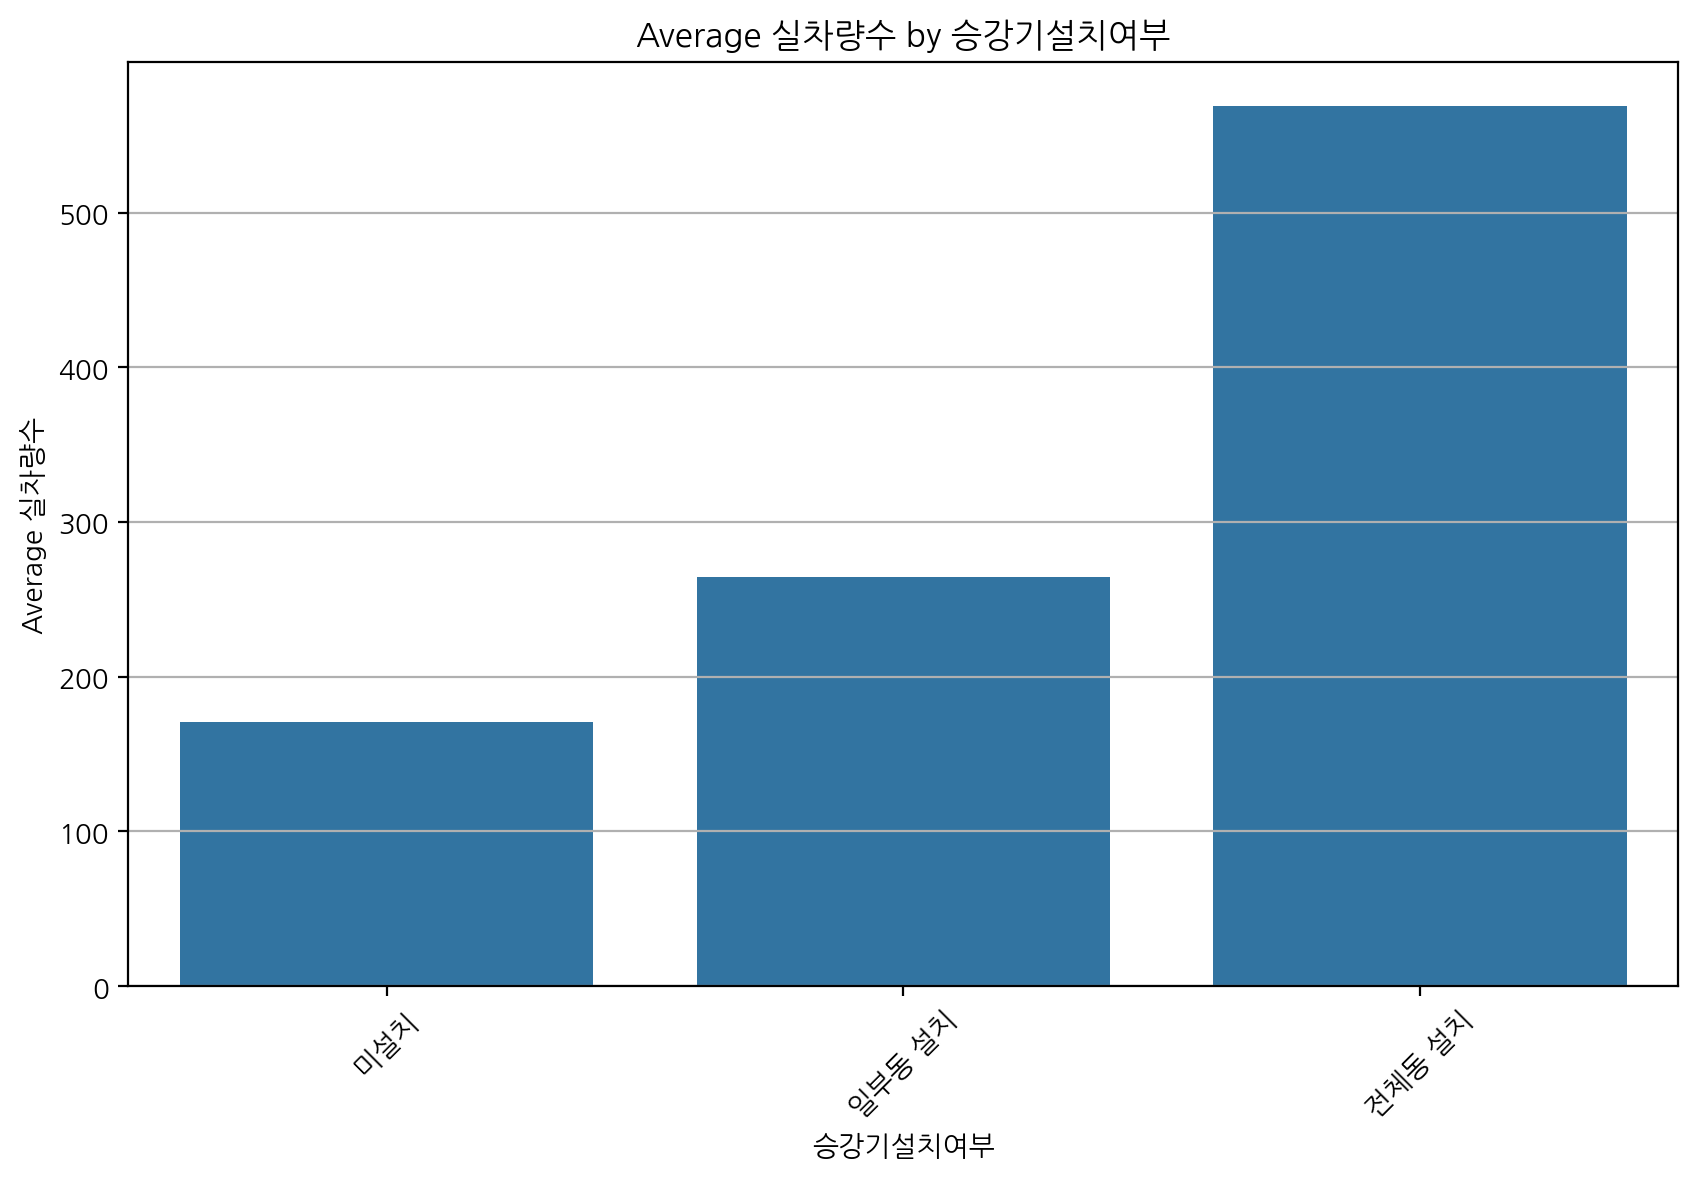

In [692]:
# 승강기설치여부 - 실차량수 관계
plot_bar(apart, '승강기설치여부')

# 분석
# 전체동 설치가 가장 높고 미설치가 가장 낮은 것을 볼 수 있습니다. 

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [696]:
# '난방방식' 변수 값 변경
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

# 변경된 결과 확인
print(apart['난방방식'].value_counts())

난방방식
개별    211
지역    115
중앙     19
Name: count, dtype: int64


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [698]:
# '승강기설치여부' 변수 값 변경
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': 1,
    '일부동 설치': 0,
    '미설치': 0
})

# 변경된 결과 확인
print(apart['승강기설치여부'].value_counts())

승강기설치여부
1    333
0     12
Name: count, dtype: int64


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [700]:
# '단지코드'와 '지역' 변수 제거
apart = apart.drop(columns=['단지코드', '지역'])

- 최종 데이터를 확인합니다.

In [703]:
# 결과 확인
apart.head(5)

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적0_10,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,0,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,0,15,0,0,0,0,0,0,5.522750e+07,340148.333333


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [706]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']